<a href="https://colab.research.google.com/github/DeepC004/insurance-analysis/blob/main/DM%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
































































































































































































































































































































































### Connect to GDrive and import the datasets

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/gdrive')
%cd /gdrive

Drive not mounted, so nothing to flush and unmount.
Mounted at /gdrive
/gdrive


Add the right path to GDrive folder according to your local setup

In [ ]:
%cd MyDrive/Dataset/Data/IAKR

/gdrive/.shortcut-targets-by-id/17zqeLJPv4FsSMKsgE8HfbwCPJxq1hlCG/Data/IAKR


In [ ]:
%ls

 abc.csv          'IAKR2019-21 (1).MAP'   IAKR2019-21.csv   install.sh.2
 IAKR2005-06.csv  'IAKR2019-21 (1).txt'   IAKR2019-21.MAP   install.sh.3
 IAKR2005-06.MAP  'IAKR2019-21 (2).MAP'   IAKR2019-21.txt   install.sh.4
 IAKR2015-16.csv  'IAKR2019-21 (2).txt'   install.sh
 IAKR2015-16.MAP  'IAKR2019-21 (3).MAP'   install.sh.1


### Defining the necessary library imports 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
%matplotlib inline

<ipython-input-4-c946dcb6decc>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### Load the data
We first create a mapping between the column names given in the dataset to more human readable form following which we load the raw data contained in the CSV File into a Pandas DataFrame and use only those columns which are necessary for our data analysis

In [ ]:
map = {
    'Health Insurance':'V481',
    'Respondent Occupation':'V716',
    'Husband Occupation':'V704',
    'Pocket Cost':'S456E',
    'BMI':'V445',
    'Rohrer Index':'V446',
    'Respondent Weight':'V437',
    'Respondent Height':'V438',
    'Age Under 18':'V452A',
    'Haemoglobin':'V453',
    'Currently Pregnant':'V454',
    'Anemia Level':'V457',
    'State':'V024',
    'Husband Education':'V729',
    'Highest Education':'V106',
    'Highest Year':'V107',
    'Diabetes':'S728A',
    'Hypertension':'S728B',
    'Respiratory':'S728C',
    'Thyroid':'S728D',
    'Heart':'S728E',
    'Cancer':'S728F',
    'Kidney':'S728G',
    'Residence Type':'V025',
    'Wealth Index':'V190',
    'Employee State':'V481A',
    'Central':'V481B',
    'State':'V481C',
    'Swasthya Bima':'V481D',
    'Community':'V481E',
    'Other Government':'V481F',
    'Medical':'V481G',
    'Private':'V481H',
    'Other':'V481X'
}

In [ ]:
rmap = {
    'V481':'Health Insurance',
    'V716':'Respondent Occupation',
    'V704':'Husband Occupation',
    'S456E':'Pocket Cost',
    'V445':'BMI',
    'V446':'Rohrer Index',
    'V437':'Respondent Weight',
    'V438':'Respondent Height',
    'V452A':'Age Under 18',
    'V453':'Haemoglobin',
    'V454':'Currently Pregnant',
    'V457':'Anemia Level',
    'V024':'State',
    'V729':'Husband Education',
    'V106':'Highest Education',
    'V107':'Highest Year',
    'S728A':'Diabetes',
    'S728B':'Hypertension',
    'S728C':'Respiratory',
    'S728D':'Thyroid',
    'S728E':'Heart',
    'S728F':'Cancer',
    'S728G':'Kidney',
    'V025':'Residence Type',
    'V190':'Wealth Index',
    'V481A':'Employee State',
    'V481B':'Central',
    'V481C':'State',
    'V481D':'Swasthya Bima',
    'V481E':'Community',
    'V481F':'Other Government',
    'V481G':'Medical',
    'V481H':'Private',
    'V481X':'Other'
}

In [ ]:
df = pd.read_csv('IAKR2019-21.csv', usecols = ['V481', 'V716', 'V704', 'S456E', 'V445', 'V446', 'V437',  'V438',  'V452A'  ,'V453' ,'V454' ,'V457' , 'V024' ,'V729', 'V106',  'V107'  ,'S728A', 'S728B','S728C','S728D','S728E','S728F','S728G','V025', 'V190','V481A',"V481B","V481C","V481D","V481E","V481F","V481G","V481H","V481X"])
df.describe()

<ipython-input-7-c62ded1baaa8>:1: DtypeWarning: Columns (52,307,308,316,317) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IAKR2019-21.csv', usecols = ['V481', 'V716', 'V704', 'S456E', 'V445', 'V446', 'V437',  'V438',  'V452A'  ,'V453' ,'V454' ,'V457' , 'V024' ,'V729', 'V106',  'V107'  ,'S728A', 'S728B','S728C','S728D','S728E','S728F','S728G','V025', 'V190','V481A',"V481B","V481C","V481D","V481E","V481F","V481G","V481H","V481X"])


,V024,V025,V106,V190,V452A,V453,V454,V457,V481,V481A,...,V481G,V481H,V481X,S728A,S728B,S728C,S728D,S728E,S728F,S728G
count,232920.000000,232920.000000,232920.000000,232920.000000,232920.000000,232920.000000,232920.000000,232920.000000,232920.000000,232920.000000,...,232920.000000,232920.000000,232920.000000,232920.000000,232920.00000,232920.000000,232920.000000,232920.000000,232920.000000,232920.000000
mean,16.411686,1.797360,1.567508,2.654675,1.998072,146.902434,0.071175,3.268259,0.269238,0.005289,...,0.000923,0.003611,0.082084,0.078362,0.07925,0.034952,0.060033,0.038717,0.036193,0.041040
std,9.099935,0.401968,0.978735,1.378958,0.043863,166.590634,0.257117,1.425253,0.443565,0.072536,...,0.030368,0.059980,0.274493,0.749327,0.64633,0.468081,0.596860,0.526236,0.529943,0.545063
min,1.000000,1.000000,0.000000,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,2.000000,1.000000,1.000000,2.000000,106.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,2.000000,2.000000,116.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,2.000000,2.000000,4.000000,2.000000,126.000000,0.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,37.000000,2.000000,3.000000,5.000000,2.000000,999.000000,1.000000,9.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000


## 1 Data Preprocessing
The data preprocessing step involves various data cleaning, data reduction and data transformation methods. The goal of data preprocessing is to transform the raw data into more suitable form for further data analysis or usage by machine learning models. 
### 1.1 Data Cleaning
Data cleaning attempts to fill in the missing values, smooth out noisy data, analyse and remove outliers and correct any data inconsistencies. In the code below remove the rows which contain any missing values or NULL values in the dataset.

In [ ]:
column_name =[map['Health Insurance'],map['Husband Occupation'],map['Pocket Cost'],map['BMI'],map['Rohrer Index'],map['Respondent Weight'],map['Respondent Height'],map['Age Under 18'],map['Haemoglobin'],map['Currently Pregnant'],map['Anemia Level'],map['Husband Education'],map['Highest Education'],map['Highest Year'],map['Wealth Index'],map['Husband Education'],map['Diabetes'],map['Hypertension'],map['Respiratory'],map['Thyroid'],map['Heart'],map['Cancer'],map['Kidney'],map['Employee State'],map['Central'],map['State'],map['Swasthya Bima'],map['Community'],map['Other Government'],map['Medical'],map['Private'],map['Other']]
filter_values=[[9],[98],[" "],[9999],[9999],[9994,9995,9996,9999],[9994,9995,9996,9999],[9],[994,995,996,998,999],[9],[9],[9],[9],[99],[" "],[9],[8],[8],[8],[8],[8],[8],[8],[9],[9],[9],[9],[9],[9],[9],[9],[9]]
filter_mask=[]
for i in range(len(column_name)):
    newdf=df.mask(df[column_name[i]]==" ")
    newdf=newdf.dropna(axis=0)
    df=newdf
    for j in range(len(filter_values[i])):
      newdf=df.mask(df[column_name[i]]==filter_values[i][j])
      newdf=newdf.dropna(axis=0)
      df=newdf

In [ ]:
df.rename(columns=rmap,inplace=True)
df.describe()

,State,Residence Type,Highest Education,Wealth Index,Age Under 18,Haemoglobin,Currently Pregnant,Anemia Level,Health Insurance,Employee State,...,Medical,Private,Other,Diabetes,Hypertension,Respiratory,Thyroid,Heart,Cancer,Kidney
count,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,...,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000
mean,17.378447,1.747681,2.073254,3.086693,1.996971,115.547795,0.068585,3.096221,0.274465,0.007950,...,0.001577,0.005048,0.082529,0.008896,0.028961,0.009212,0.023472,0.004732,0.001010,0.003975
std,9.791975,0.434357,0.583184,1.343720,0.054951,15.879627,0.252755,0.897380,0.446259,0.088811,...,0.039686,0.070869,0.275177,0.093904,0.167702,0.095539,0.151400,0.068630,0.031758,0.062924
min,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,2.000000,2.000000,2.000000,106.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2.000000,2.000000,3.000000,2.000000,117.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,2.000000,2.000000,4.000000,2.000000,126.000000,0.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,37.000000,2.000000,3.000000,5.000000,2.000000,244.000000,1.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.2 Data Transformation
Data Transformation is the process of changing the data to suitable form as required by the data analysis methods. It involves Feature Creation, Data Aggregation, Data Normalization and Data Discretization. Data Normalization is a technique to rescale the data so that all the data attributes are in the same range or distribution. Now we apply the Z-score normalization to the continuous data points in our dataset.

In [ ]:
df_norm=df[['BMI','Rohrer Index','Respondent Weight', 'Respondent Height','Haemoglobin','Anemia Level']] # These are the continuous data points in the dataset
df_norm=df_norm.astype(float) # Converting the continuous data points to float type
numpy_array = np.array(df_norm)

In [ ]:
# z-score normalization
X = numpy_array
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
pca_input_description = pd.DataFrame(X_std)
pca_input_description.describe()

,0,1,2,3,4,5
count,1.584900e+04,1.584900e+04,1.584900e+04,1.584900e+04,1.584900e+04,1.584900e+04
mean,-4.662530e-17,-1.793281e-16,-2.295400e-16,1.348547e-15,-3.801756e-16,1.506356e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-2.186133e+00,-2.288847e+00,-3.457800e+00,-8.355627e+00,-5.639340e+00,-2.336007e+00
25%,-6.417568e-01,-5.463956e-01,-7.077995e-01,-6.166931e-01,-6.012796e-01,-1.221617e+00
50%,-1.339880e-01,-1.154381e-01,-1.577994e-01,-2.262553e-02,9.145372e-02,-1.072272e-01
75%,4.538440e-01,3.740444e-01,5.599974e-01,6.356656e-01,6.582356e-01,1.007162e+00
max,1.633795e+01,2.266678e+01,9.695592e+00,7.443359e+00,8.089375e+00,1.007162e+00


### 1.3 Data Reduction
Data reduction techniques are used to obtain a reduced representation of the original raw data. The goal of data reduction is to remove the redundant data or unnecessary data attributes, yet closely maintain the integrity of the original data and retains the relevant and informative features.
#### Principle Component Analysis
PCA is an unsupervised linear transformation technique used for dimensionality reduction. PCA essentially finds the directions of maximum variance in a high dimensional dataset and projects it onto a new subspace with equal or fewer dimensions than the original one. The steps involved in PCA are:
- Calculate the Covariance Matrix
- Calculate the eigenvalues and eigenvectors using covariance matrix
- Sort the eigenvalues in descending order and choose the top n components 
- Project the data on these principle components
- Finally return the PCA components and the variance captured by each component

Now we define a function which applies PCA on the given input. 

In [ ]:
# performs Principle Component Analysis for reducing the dimensionality
def pca(X, n_components):
    """
    Performs PCA on the input data X.
    Returns the principal components and the variance explained by each component.
    """

    # Calculate the covariance matrix
    cov_mat = np.cov(X_std, rowvar=False)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

    # Sort the eigenvalues in descending order
    idx = np.argsort(eigen_vals)[::-1]
    eigen_vals = eigen_vals[idx]
    eigen_vecs = eigen_vecs[:, idx]

    # Select the top n_components eigenvectors
    eigen_vecs = eigen_vecs[:, :n_components]

    # Project the data onto the principal components
    X_pca = np.dot(X_std, eigen_vecs)

    # Calculate the variance explained by each principal component
    explained_variances = eigen_vals[:n_components] / np.sum(eigen_vals)

    return X_pca, explained_variances

Below is the cumulative line plot showing the increasing variance captured by the PCA attributes as well as the individual bar plot showing the variance contribution of individual attributes

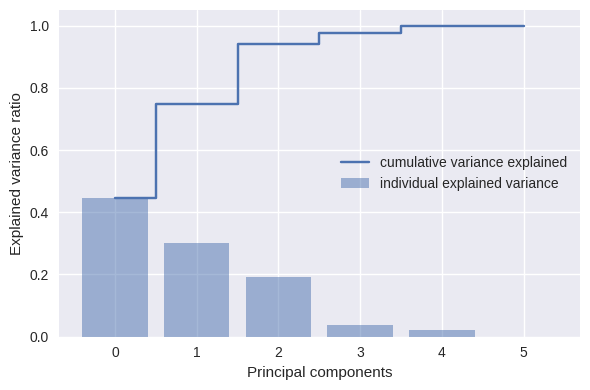

In [ ]:
input_attribute_number = 6
numpy_array_pca, explained_variance = pca(numpy_array, input_attribute_number)
cumulative_variance_explained = np.cumsum(explained_variance)
plt.figure(figsize=(6, 4))
plt.step(range(6), cumulative_variance_explained, where = 'mid', label = 'cumulative variance explained')
plt.bar(range(6), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Since we want only the top 3 PCA components we set the number of components to 3 and call the PCA function which returns the values of 3 PCA components as well as the individual variance contributed by each component on input data.

In [ ]:
number_of_components=3
numpy_array_pca,explained_variance = pca(numpy_array, number_of_components)
print(explained_variance)

[0.44628848 0.30210109 0.19278312]


Since PCA is one of the techniques used for dimensionality reduction, we remove the 6 continuous input data attributes from the data and add the top 3 PCA components back to the DataFrame. This reduces the dimensionality of data by 3.

In [ ]:
# Remove the PCA input rows from df and add the new PCA output rows
pca_df = pd.DataFrame(numpy_array_pca)
df.drop(['BMI','Rohrer Index','Respondent Weight', 'Respondent Height','Haemoglobin','Anemia Level'], axis = 1, inplace = True)
df['PCA1'] = pca_df[0].tolist()
df['PCA2'] = pca_df[1].tolist()
df['PCA3'] = pca_df[2].tolist()
print(df.shape)
df['PCA1'].describe()

KeyError: ignored

### 1.2 Data Transformation
Earlier we talked about Data Transformation. One of the techniques of data transformation is feature generation. This means new features can be generated from the existing features or data attributes. These new features can capture complex relationships and thus improve the performance of ML model.

Now we generate a new feature called 'Disease' based on the presence of existing diseases already present in the feature set. 

In [ ]:
df.keys()

Index(['State', 'Residence Type', 'Highest Education', 'Highest Year',
       'Wealth Index', 'Age Under 18', 'Currently Pregnant',
       'Health Insurance', 'Employee State', 'Central', 'State',
       'Swasthya Bima', 'Community', 'Other Government', 'Medical', 'Private',
       'Other', 'Husband Occupation', 'Respondent Occupation',
       'Husband Education', 'Diabetes', 'Hypertension', 'Respiratory',
       'Thyroid', 'Heart', 'Cancer', 'Kidney', 'Pocket Cost', 'PCA1', 'PCA2',
       'PCA3'],
      dtype='object')

In [ ]:
# Feature generation using existing features
disease_list = ['Diabetes', 'Hypertension', 'Respiratory', 'Thyroid', 'Heart', 'Cancer', 'Kidney']
disease_df = df[disease_list]
is_disease = disease_df.sum(axis=1)
numpy_is_disease = is_disease.to_numpy()
for i in range(0, len(numpy_is_disease)):
  if numpy_is_disease[i] != 0.0:
    numpy_is_disease[i] = 1.0
df['Disease'] = numpy_is_disease
print(df['Disease'])

6         0.0
30        0.0
32        0.0
35        0.0
63        0.0
         ... 
232858    0.0
232862    0.0
232882    0.0
232895    0.0
232901    0.0
Name: Disease, Length: 15849, dtype: float64


In [ ]:
df.describe()

,State,Residence Type,Highest Education,Wealth Index,Age Under 18,Currently Pregnant,Health Insurance,Employee State,Central,State,...,Hypertension,Respiratory,Thyroid,Heart,Cancer,Kidney,PCA1,PCA2,PCA3,Disease
count,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,...,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,1.584900e+04,1.584900e+04,1.584900e+04,15849.000000
mean,17.378447,1.747681,2.073254,3.086693,1.996971,0.068585,0.274465,0.007950,0.017099,0.121711,...,0.028961,0.009212,0.023472,0.004732,0.001010,0.003975,-1.757415e-16,1.434625e-17,-1.197912e-15,0.067765
std,9.791975,0.434357,0.583184,1.343720,0.054951,0.252755,0.446259,0.088811,0.129644,0.326962,...,0.167702,0.095539,0.151400,0.068630,0.031758,0.062924,1.636429e+00,1.346373e+00,1.075533e+00,0.251349
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.323580e+00,-6.000960e+00,-7.490601e+00,0.000000
25%,9.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.102899e+00,-1.143180e+00,-6.860013e-01,0.000000
50%,18.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.889761e-01,-1.240560e-01,2.035673e-02,0.000000
75%,24.000000,2.000000,2.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.480591e-01,1.085441e+00,6.505570e-01,0.000000
max,37.000000,2.000000,3.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.750414e+01,1.008324e+01,1.082692e+01,1.000000


Now we convert the object data types to float64 since they are easier to process.

In [ ]:
types = df.dtypes
print(types)

State                    float64
Residence Type           float64
Highest Education        float64
Highest Year              object
Wealth Index             float64
Age Under 18             float64
Currently Pregnant       float64
Health Insurance         float64
Employee State           float64
Central                  float64
State                    float64
Swasthya Bima            float64
Community                float64
Other Government         float64
Medical                  float64
Private                  float64
Other                    float64
Husband Occupation        object
Respondent Occupation     object
Husband Education         object
Diabetes                 float64
Hypertension             float64
Respiratory              float64
Thyroid                  float64
Heart                    float64
Cancer                   float64
Kidney                   float64
Pocket Cost               object
PCA1                     float64
PCA2                     float64
PCA3      

In [ ]:
changed = []
for item in df[rmap['V107']]:
    changed.append(float(item))
df[rmap['V107']] = changed

changed = []
for item in df[rmap['V704']]:
    changed.append(float(item))
df[rmap['V704']] = changed

changed = []
for item in df[rmap['V716']]:
    changed.append(float(item))
df[rmap['V716']] = changed

changed = []
for item in df[rmap['V729']]:
    changed.append(float(item))
df[rmap['V729']] = changed

changed = []
for item in df[rmap['S456E']]:
    changed.append(float(item))
df[rmap['S456E']] = changed

In [ ]:
df.describe()

,State,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Health Insurance,Employee State,Central,...,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,PCA1,PCA2,PCA3,Disease
count,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,...,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,15849.000000,1.584900e+04,1.584900e+04,1.584900e+04,15849.000000
mean,17.378447,1.747681,2.073254,4.286453,3.086693,1.996971,0.068585,0.274465,0.007950,0.017099,...,0.009212,0.023472,0.004732,0.001010,0.003975,0.005363,-1.757415e-16,1.434625e-17,-1.197912e-15,0.067765
std,9.791975,0.434357,0.583184,1.671568,1.343720,0.054951,0.252755,0.446259,0.088811,0.129644,...,0.095539,0.151400,0.068630,0.031758,0.062924,0.073039,1.636429e+00,1.346373e+00,1.075533e+00,0.251349
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.323580e+00,-6.000960e+00,-7.490601e+00,0.000000
25%,9.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.102899e+00,-1.143180e+00,-6.860013e-01,0.000000
50%,18.000000,2.000000,2.000000,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.889761e-01,-1.240560e-01,2.035673e-02,0.000000
75%,24.000000,2.000000,2.000000,5.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.480591e-01,1.085441e+00,6.505570e-01,0.000000
max,37.000000,2.000000,3.000000,8.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.750414e+01,1.008324e+01,1.082692e+01,1.000000


In [ ]:
# What visualizations can be added?
# 1. Histogram bin plots showing the number and distribution of values across features
# 2. Pairwise plots for various sets of features along, each including insurance values, showing that we cannot directly
# deduce value of insurance by just using a single feature

### 1.4  Data Visualization
Now we visualize the preprocessed data. This is an important step in data analysis since it helps us to find relations among the data attributes as well as any underlying data patterns. It also helps us to visually remove any outliers present in the dataset, making it more robust.

array([[<Axes: title={'center': 'State'}>,
        <Axes: title={'center': 'Residence Type'}>,
        <Axes: title={'center': 'Highest Education'}>,
        <Axes: title={'center': 'Highest Year'}>],
       [<Axes: title={'center': 'Wealth Index'}>,
        <Axes: title={'center': 'Age Under 18'}>,
        <Axes: title={'center': 'Currently Pregnant'}>,
        <Axes: title={'center': 'Health Insurance'}>],
       [<Axes: title={'center': 'Employee State'}>,
        <Axes: title={'center': 'Central'}>,
        <Axes: title={'center': 'State'}>,
        <Axes: title={'center': 'Swasthya Bima'}>],
       [<Axes: title={'center': 'Community'}>,
        <Axes: title={'center': 'Other Government'}>,
        <Axes: title={'center': 'Medical'}>,
        <Axes: title={'center': 'Private'}>],
       [<Axes: title={'center': 'Other'}>,
        <Axes: title={'center': 'Husband Occupation'}>,
        <Axes: title={'center': 'Respondent Occupation'}>,
        <Axes: title={'center': 'Husband Educa

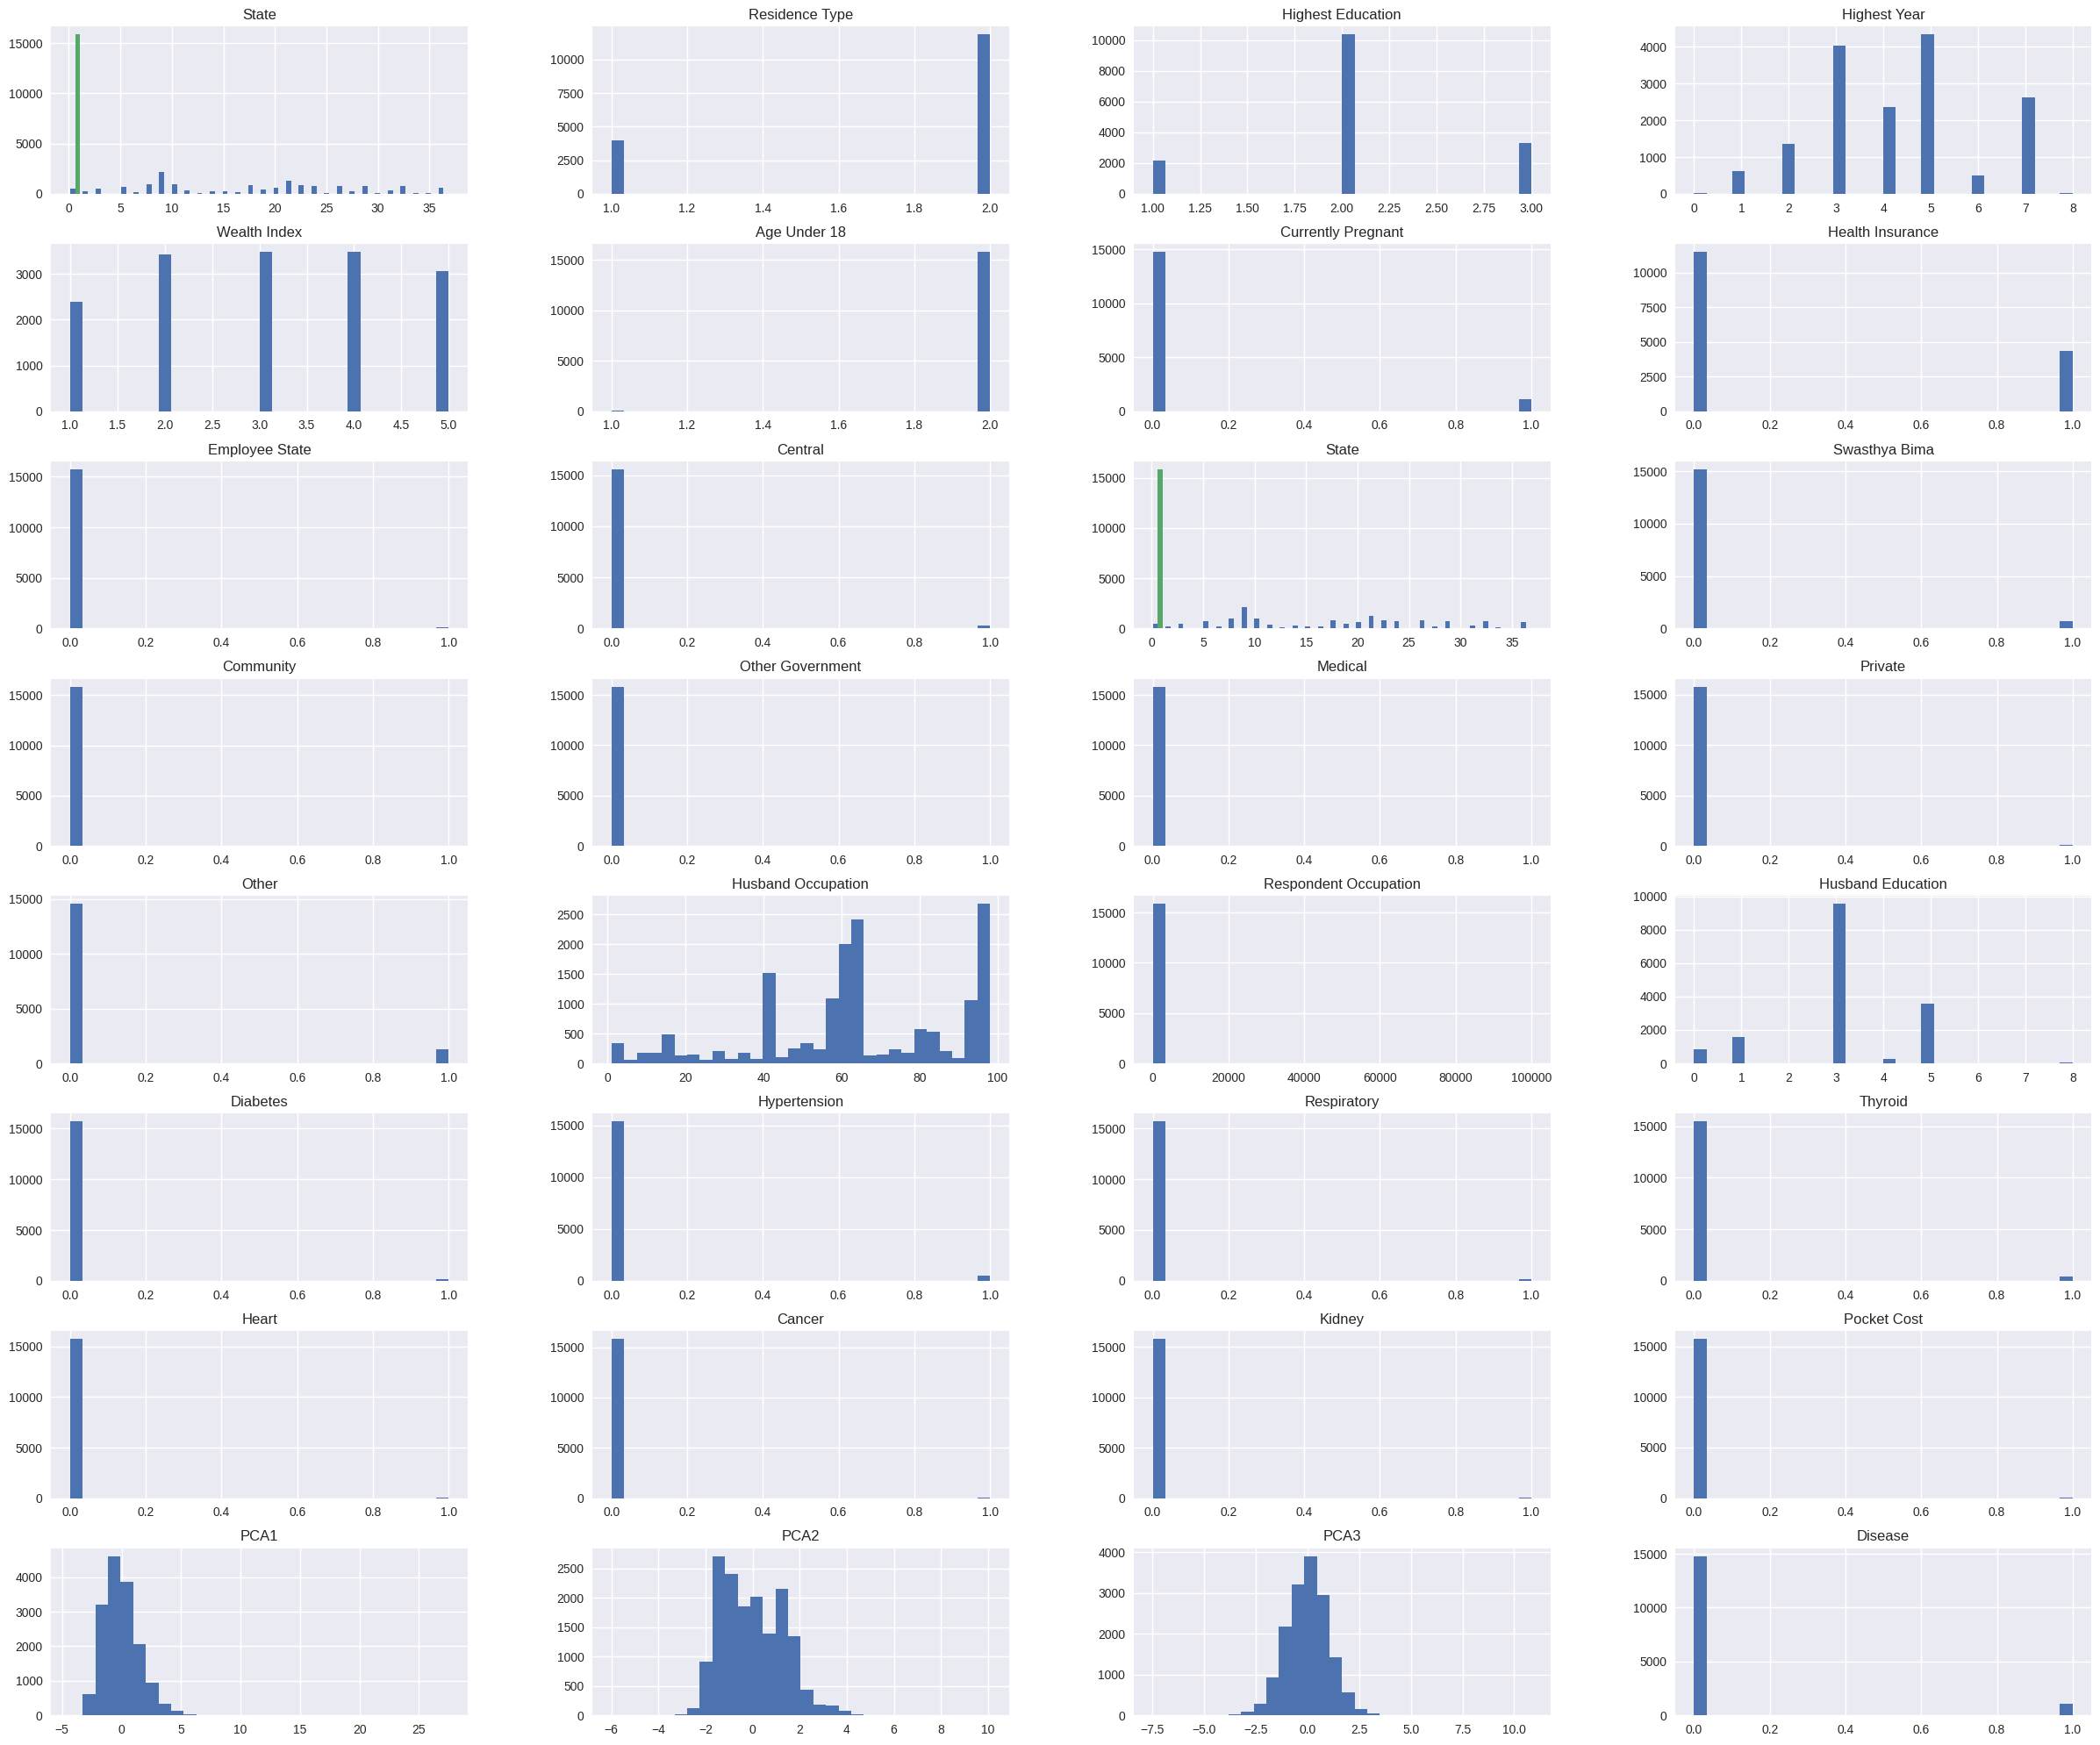

In [ ]:
fig, axis = plt.subplots(8,4,figsize=(30, 25))
# plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
df.hist(ax=axis, bins = 30)

Outlier removal by analysing pairwise plots of PCA data attributes as well as the data distribution of attributes.

In [ ]:
print(df[rmap['V716']].describe())
df = df[df[rmap['V716']] < 100]
print(df[rmap['V716']].describe())

count    15849.000000
mean       114.477065
std       3175.423259
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99998.000000
Name: Respondent Occupation, dtype: float64
count    15833.000000
mean        13.540011
std         26.999133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.000000
Name: Respondent Occupation, dtype: float64


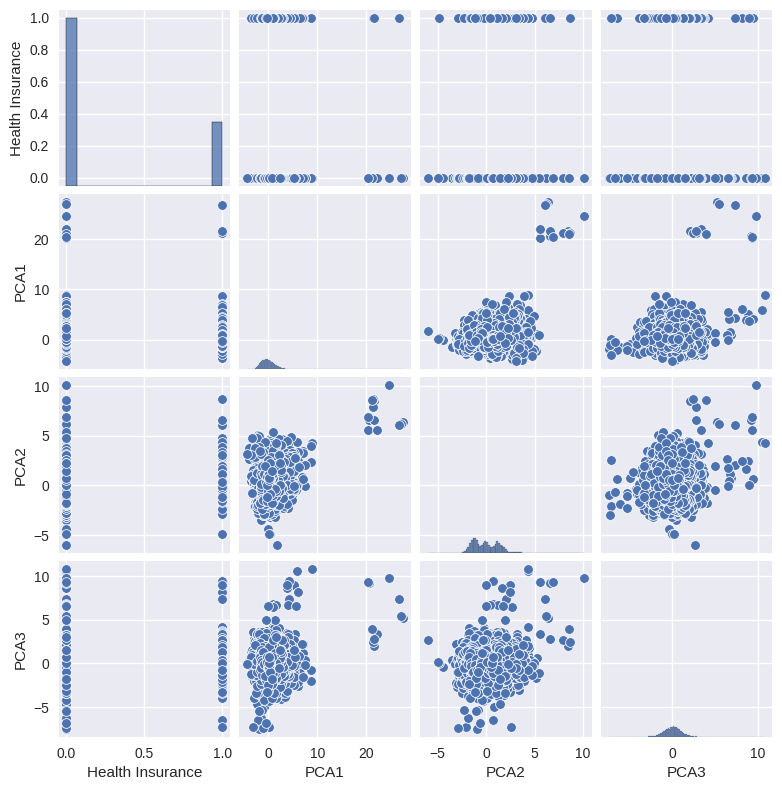

In [ ]:
import seaborn as sns
cols = [rmap['V481'], 'PCA1', 'PCA2', 'PCA3']
sns.pairplot(df[cols], height = 2)
plt.show()

<Axes: xlabel='PCA1', ylabel='PCA3'>

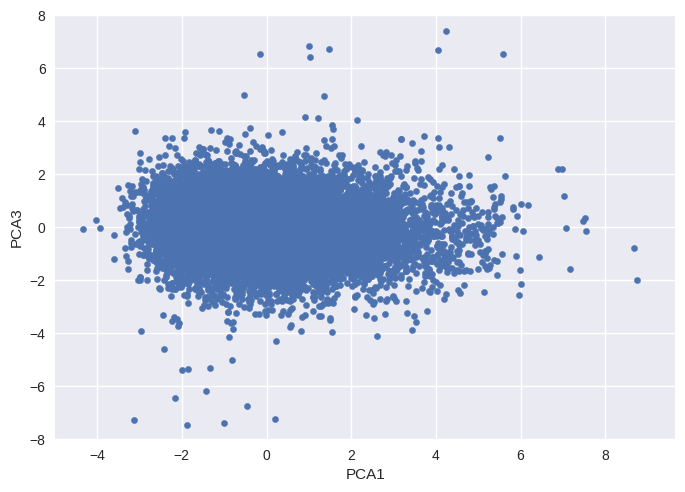

In [ ]:
# removed outliers in PCA1
df = df[df.PCA1 < 20]
dd = pd.concat([df['PCA1'], df['PCA3']], axis = 1)
dd.plot.scatter(x='PCA1', y='PCA3', ylim=(-8,8))

<Axes: xlabel='PCA2', ylabel='PCA1'>

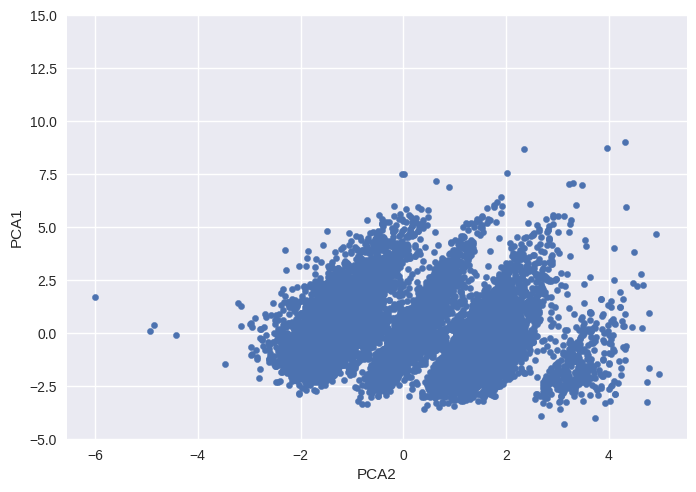

In [ ]:
# removed outliers in PCA2
df = df[df.PCA2 < 5]
dd = pd.concat([df['PCA2'], df['PCA1']], axis = 1)
dd.plot.scatter(x='PCA2', y='PCA1', ylim=(-5,15))

In [ ]:
df.describe()

,State,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Health Insurance,Employee State,Central,...,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,PCA1,PCA2,PCA3,Disease
count,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,...,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000,15817.000000
mean,17.372194,1.747740,2.073339,4.286843,3.087185,1.996965,0.068597,0.274641,0.007966,0.017070,...,0.009231,0.023456,0.004679,0.001012,0.003983,0.005374,-0.018657,-0.007260,-0.004754,0.067775
std,9.792388,0.434324,0.583176,1.671558,1.344136,0.055006,0.252776,0.446347,0.088900,0.129537,...,0.095634,0.151351,0.068242,0.031790,0.062988,0.073112,1.498812,1.328426,1.060619,0.251368
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.323580,-6.000960,-7.490601,0.000000
25%,9.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.104586,-1.145004,-0.686422,0.000000
50%,18.000000,2.000000,2.000000,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.189702,-0.125873,0.018822,0.000000
75%,24.000000,2.000000,2.000000,5.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.846094,1.082694,0.648139,0.000000
max,37.000000,2.000000,3.000000,8.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.990021,4.969987,10.826923,1.000000


In [ ]:
df = df.drop_duplicates()
df

,State,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Health Insurance,Employee State,Central,...,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,PCA1,PCA2,PCA3,Disease
6,1.0,2.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.069981,-1.886478,-0.899969,0.0
30,1.0,2.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.893195,-1.514105,-0.271782,0.0
32,1.0,2.0,3.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.224283,-1.472048,-0.405135,0.0
35,1.0,2.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.185695,0.093845,-0.083138,0.0
63,1.0,2.0,2.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.091108,1.894978,-1.572406,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232858,37.0,2.0,2.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.210124,0.562635,-0.000812,0.0
232862,37.0,2.0,3.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.130167,0.734585,0.683276,0.0
232882,37.0,1.0,2.0,7.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.728020,1.480060,-1.801368,0.0
232895,37.0,1.0,2.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.324119,2.268020,1.526836,0.0


<Axes: >

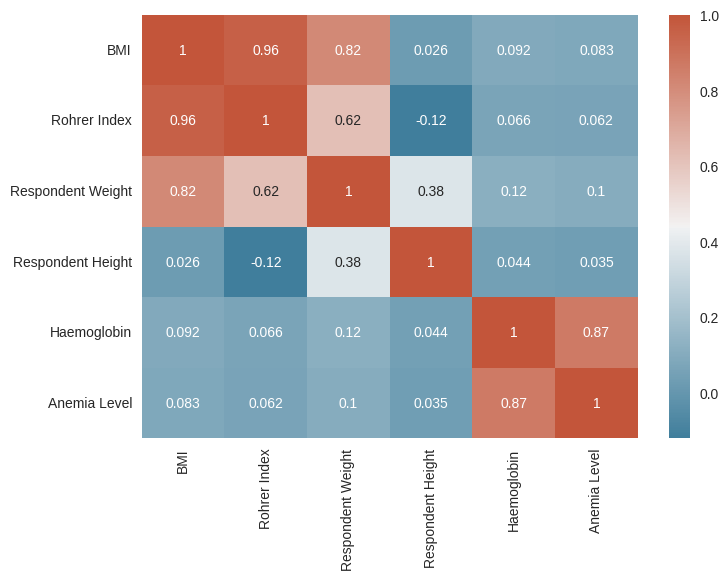

In [ ]:
# heatmap which shows pairwise correlation between the continuous attributes present in data
corr =df_norm.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

We analyse the preprocessed data using various similarity measures like Simple Matching Coefficient and Jaccard Score between various attributes.

In [ ]:
#finding simple matching coefficient between different attributes and V481(whether the person has taken insurance)
total_number_of_rows= df.shape[0]
numerator_smc = ((df[rmap['V481']] == 1.0) & (df['Disease'] == 1.0) | (df[rmap['V481']] == 0.0) & (df['Disease'] == 0.0)).sum()
smc_value=numerator_smc/total_number_of_rows
print("SMC Value of V481 with Disease :",smc_value)

SMC Value of V481 with Disease : 0.6927174689794062


In [ ]:
#finding Jaccard Score between Disease and V481
numerator_jaccard =((df[rmap['V481']] == 1.0) & (df['Disease'] == 1.0)).sum()
jaccard_score =numerator_jaccard/total_number_of_rows
print("Jaccard Score of V481 with Disease :",jaccard_score)

Jaccard Score of V481 with Disease : 0.019034626128759825


## 2 Data Analysis
Now that we have preprocessed the raw data, it is time to extract useful information from this data. Data analysis is the automated extraction of useful information or patterns using the existing data. There are various different methods to analyse/mine data. The data mining techniques can be divided into two broad categories namely Descriptive Data Mining and Predictive Data Mining. Under Descriptive Data Mining we have techniques like:
- Association Rule Mining 
- Clustering

These are used to find similarity between the given data attributes and thus draw necessary inferences from this analysis.

The other category, Predictive Data Mining consists of:
- Classification 
- Regression
- Outlier Detection

These techniques are mainly used to draw predictive inferencing on new and unseed data, using the knowledge on data which is already present in hand.

### 2.1 Predictive Data Mining

#### 2.1.1 Outlier Analysis
As mentioned earlier, there are classification, regression and outlier analysis techniques in Predictive Data Mining. We already removed some outliers above using the visual representations of data. Now we further remove any outliers using unsupervised clustering based methods, namely DBSCAN. We use DBSCAN over K-means clustering for the following reasons:
- K-means clustering works well only on spherical-shaped clusters or convex clusters.
- It is severly affected by the presence of noise and outliers in the data.


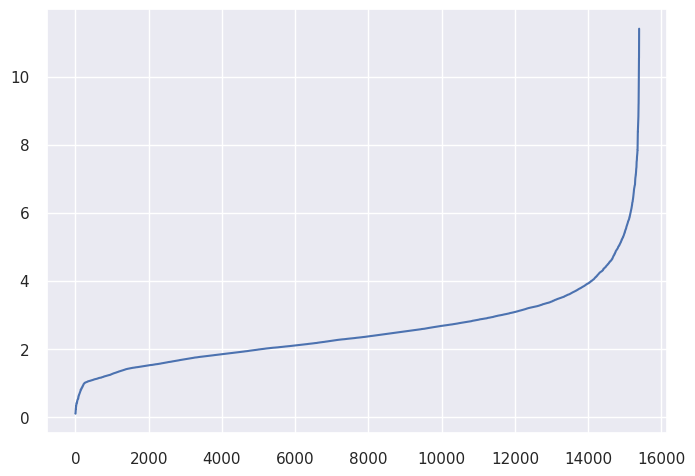

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
neigh = NearestNeighbors(n_neighbors=4)
X = df
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

# Load data
X = df

# DBSCAN parameters
eps = 5
min_samples = 4

# Fit DBSCAN
clusters = DBSCAN(eps=eps, min_samples=min_samples)
clusters.fit(X)

# Get labels and outliers
labels = clusters.labels_
outliers = X[labels == -1]

# Print results
print('Labels:', labels)
print('Outliers:', outliers)

Labels: [ 0  0 -1 ... -1 -1 53]
Outliers:         State  Residence Type  Highest Education  Highest Year  Wealth Index  \
32        1.0             2.0                3.0           3.0           4.0   
63        1.0             2.0                2.0           5.0           3.0   
315       1.0             1.0                3.0           7.0           4.0   
396       1.0             2.0                2.0           4.0           3.0   
555       1.0             2.0                2.0           5.0           2.0   
...       ...             ...                ...           ...           ...   
232691   37.0             2.0                3.0           3.0           2.0   
232751   37.0             2.0                3.0           3.0           2.0   
232862   37.0             2.0                3.0           1.0           3.0   
232882   37.0             1.0                2.0           7.0           4.0   
232895   37.0             1.0                2.0           4.0           4.0  

Above are the outlier values as removed by DBSCAN algorithm. As we can see 707 rows have been considered as outliers and removed. The number of outliers changes significantly when either the `eps` or `min_samples` values are changed. Below are the labels of the clusters formed after clustering using DBSCAN algorithm.

In [ ]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 11835,
         -1: 840,
         1: 10,
         2: 1334,
         15: 12,
         3: 8,
         4: 5,
         5: 10,
         6: 60,
         7: 8,
         11: 4,
         8: 4,
         18: 88,
         16: 4,
         9: 264,
         14: 7,
         10: 23,
         12: 46,
         13: 5,
         17: 42,
         21: 8,
         19: 221,
         25: 19,
         20: 6,
         22: 6,
         26: 12,
         23: 18,
         24: 17,
         28: 5,
         27: 19,
         29: 6,
         30: 11,
         32: 7,
         33: 20,
         31: 38,
         36: 9,
         34: 4,
         35: 15,
         40: 4,
         37: 10,
         38: 4,
         44: 22,
         43: 4,
         39: 57,
         48: 4,
         41: 8,
         42: 5,
         47: 6,
         45: 5,
         46: 13,
         49: 4,
         51: 4,
         52: 5,
         50: 3,
         53: 51,
         54: 6,
         55: 36,
         56: 4,
         57: 2,
         58: 10,
         60: 

Below is the graph showing all the data clusters calculated on the basis of the input data. The x-axis is PCA1 attribute and y-axis is PCA2 attribute. As we can see the high dimensional input data cannot be plotted pairwise for the purpose of visualization of clusters. For these reasons, we need to convert the high dimensional input data to lower dimension for visualization purposes

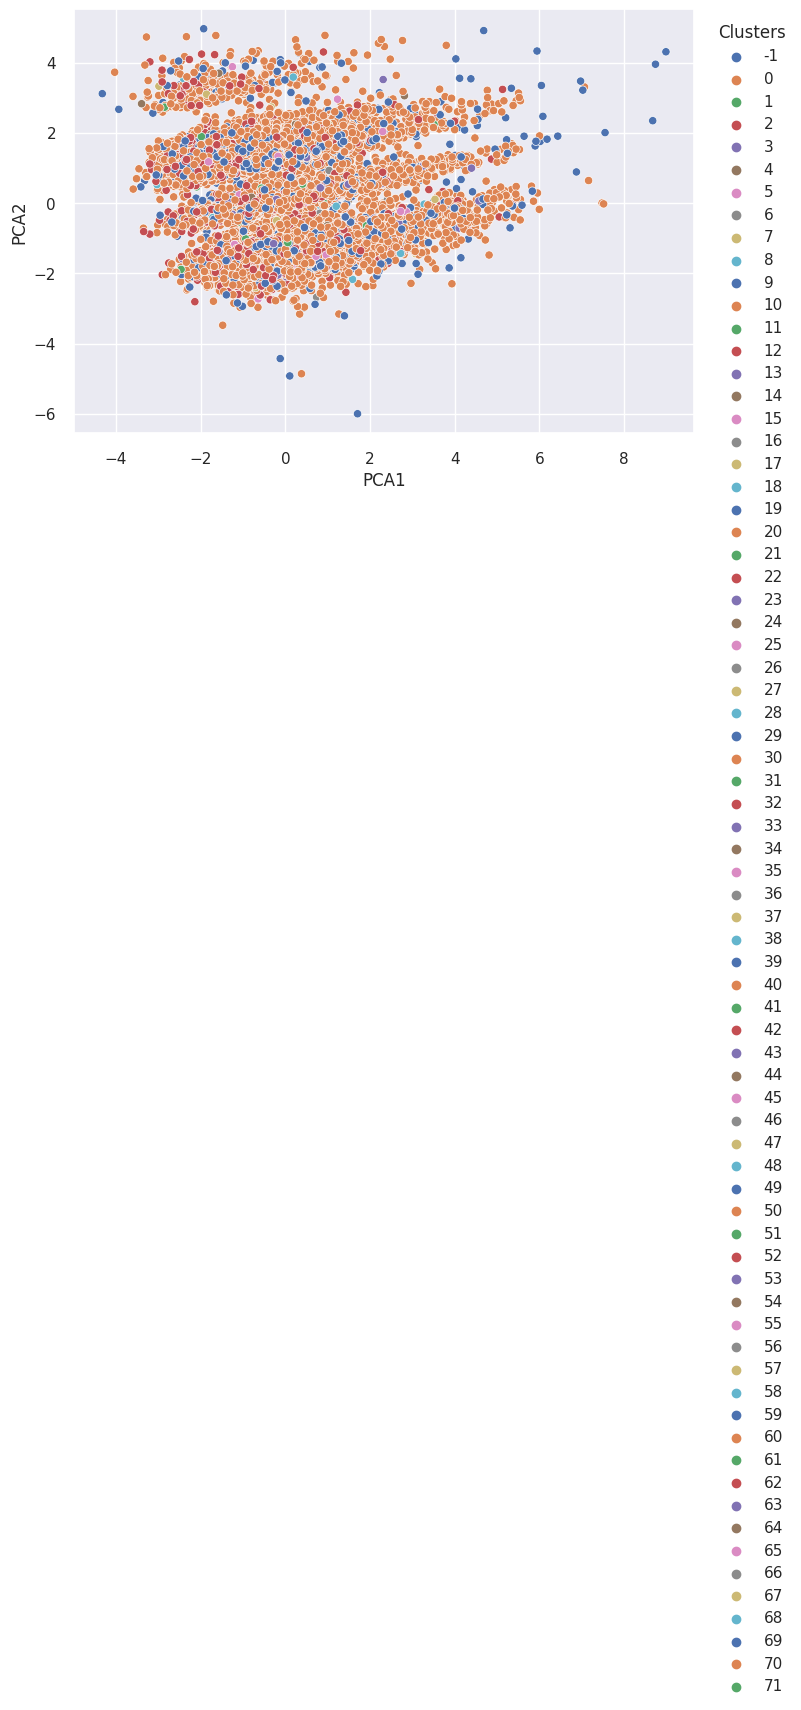

In [ ]:
p = sns.scatterplot(data = df, x = "PCA1", y = "PCA2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(df)

We first apply T-SNE to reduce the dimensionality of dataset following which we apply DBSCAN algorithm on this reduced dataset. 

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(df)

In [ ]:
X_embedded
tsne = pd.DataFrame(X_embedded, columns=['t-SNE1', 't-SNE2'])
tsne

,t-SNE1,t-SNE2
0,63.407391,38.233936
1,16.633287,31.439301
2,87.516441,4.107594
3,15.956408,33.624763
4,14.214794,-93.426033
...,...,...
15388,-41.278728,-83.949928
15389,43.186230,-39.830254
15390,82.678543,3.155473
15391,-0.662863,-92.334221


The below graph shows the data mapped from a 32 dimensional space to 2 dimensional space using t-SNE. Following this we apply DBSCAN clustering algorithm on the reduced 2 dimensional data. It can be clearly seen that better clusters are formed in lower dimensional dataset. 

<ipython-input-40-2ccd2e416b01>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = tsne, x = 't-SNE1', y = 't-SNE2', palette="deep")


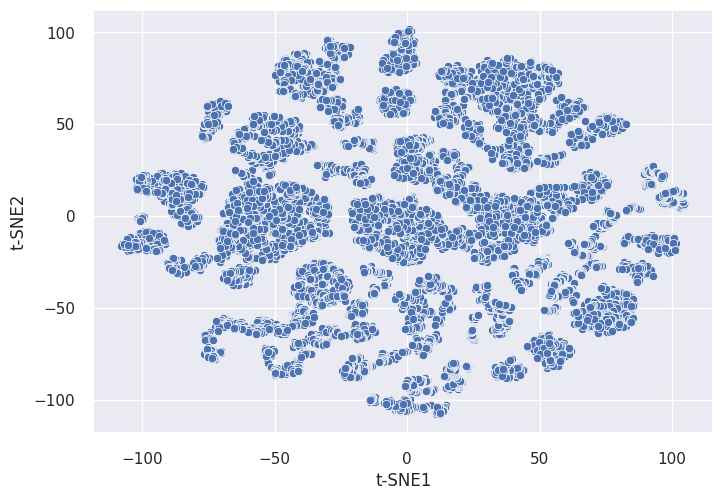

In [ ]:
sns.scatterplot(data = tsne, x = 't-SNE1', y = 't-SNE2', palette="deep")
plt.show()

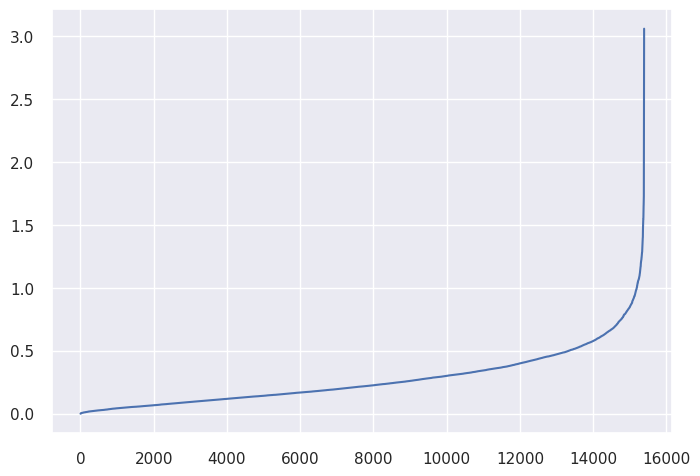

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
neigh = NearestNeighbors(n_neighbors=2)
X = tsne
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

# Load data
X = tsne

# DBSCAN parameters
eps = 2
min_samples = 3

# Fit DBSCAN
clusters_tsne = DBSCAN(eps=eps, min_samples=min_samples)
clusters_tsne.fit(X)

# Get labels and outliers
labels_tsne = clusters_tsne.labels_
outliers_tsne = X[labels_tsne == -1]

# Print results
print('Labels:', labels_tsne)
print('Outliers:', outliers_tsne)

Labels: [ 0  1  2 ...  2 32 75]
Outliers:           t-SNE1     t-SNE2
33     67.119492  51.689957
50     67.112106  51.684406
199    70.130989  45.150887
1229   56.164127  63.139881
1522   60.592850  62.372219
1548   11.146374  23.289427
1581   56.175598  63.174068
1695   60.595379  62.360909
1783  -26.464998  64.349167
2289  -26.534430  63.965954
2620   43.258888  63.088150
2727   43.504482  62.911583
2785   11.198389  23.110247
3092   41.021809 -12.908075
3165   40.998127 -12.930630
3265   29.730816  11.630457
3542   14.173660  67.865959
5940   14.245390  67.783073
5969   21.195442  60.574146
6235   21.159292  60.491669
6408   18.330856   8.010593
6620   18.169113   8.196307
6953   62.889736 -36.356407
7152   62.861496 -36.362606
8301  -58.638596  25.439558
8998   75.184982 -42.657635
9892  -67.880516  -3.677587
10518 -67.882690  -3.691397
11790 -23.217916 -45.877232
12314 -89.142166   3.138514
12359 -65.044792  25.339563
12891 -89.154022   3.115412


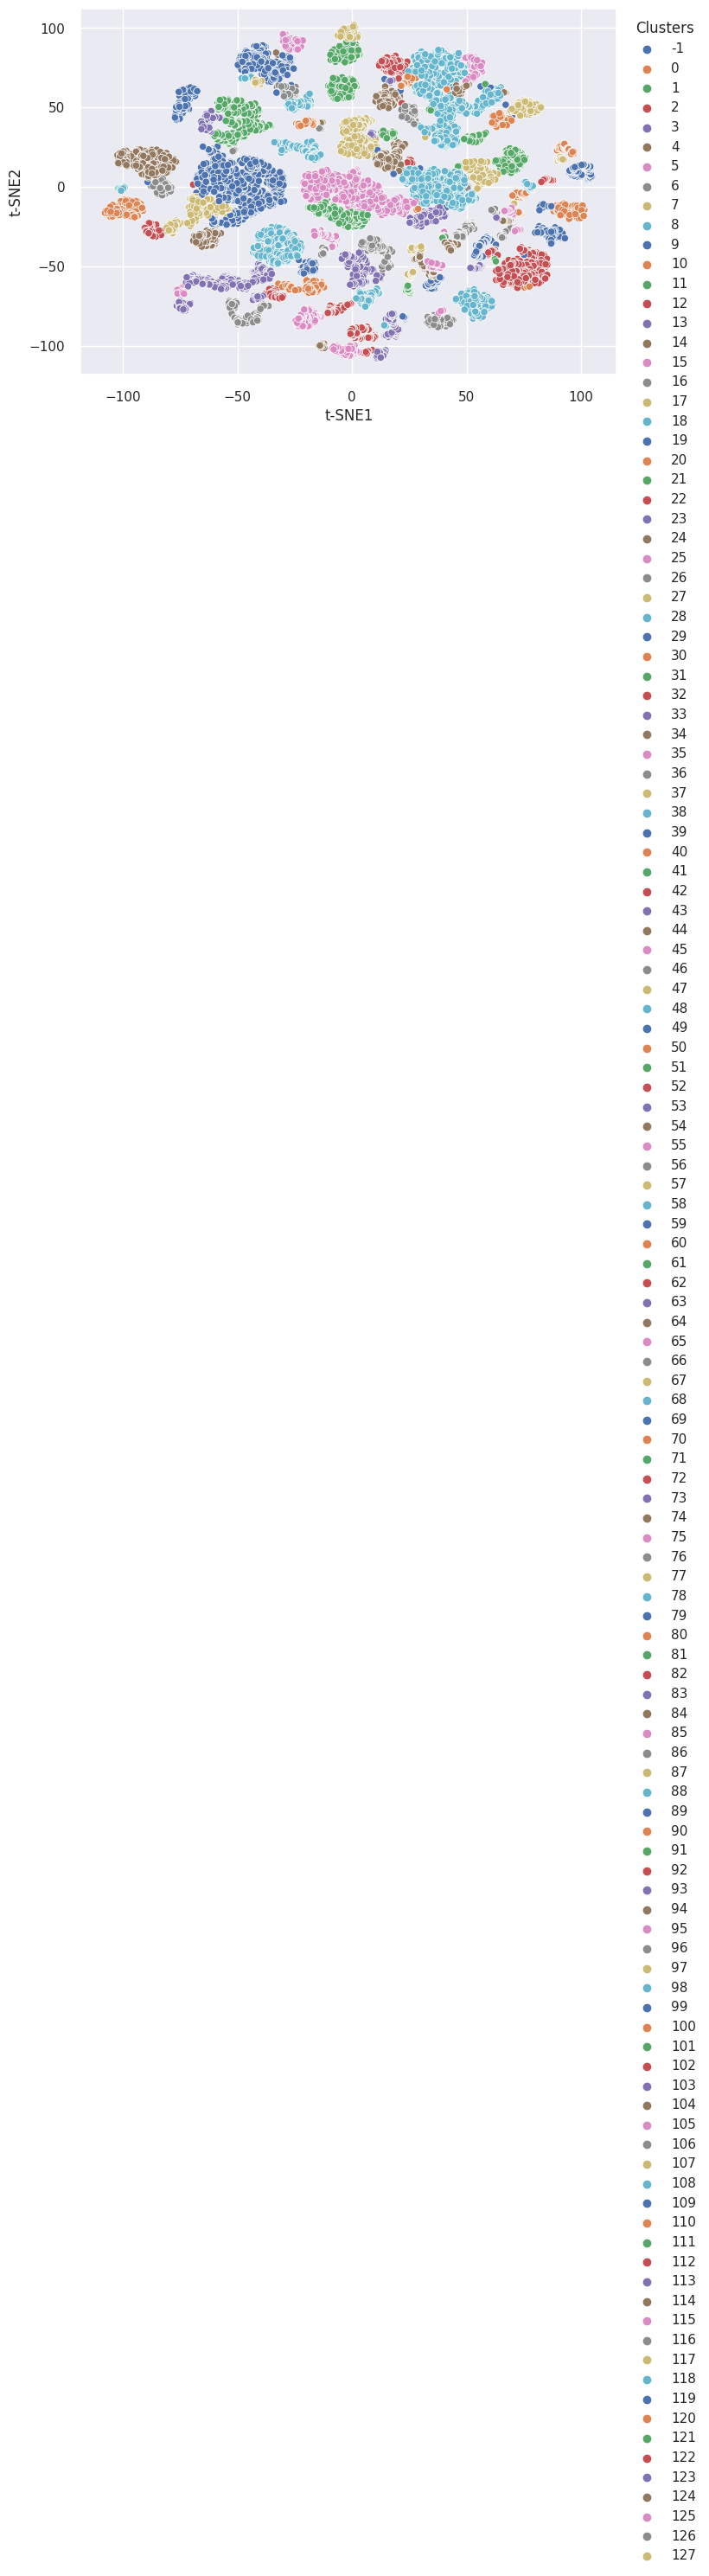

In [ ]:
p = sns.scatterplot(data = tsne, x = "t-SNE1", y = "t-SNE2", hue = clusters_tsne.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [ ]:
df.describe()
outlier_removed = pd.concat([df, outliers, outliers]).drop_duplicates(keep=False)
outlier_removed.describe()

,State,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Health Insurance,Employee State,Central,...,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,PCA1,PCA2,PCA3,Disease
count,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,...,14553.000000,14553.000000,14553.00000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000,14553.000000
mean,17.334776,1.754003,2.063148,4.277194,3.065279,1.996702,0.071463,0.274720,0.007284,0.016629,...,0.009345,0.023225,0.00481,0.001031,0.003573,0.005222,-0.043897,-0.014017,-0.004363,0.067203
std,9.711835,0.430692,0.580573,1.664389,1.342777,0.057338,0.257605,0.446388,0.085036,0.127881,...,0.096221,0.150624,0.06919,0.032089,0.059671,0.072079,1.469352,1.317472,1.017438,0.250381
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-4.031237,-4.861150,-6.776258,0.000000
25%,9.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.116665,-1.147120,-0.682609,0.000000
50%,18.000000,2.000000,2.000000,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.203788,-0.130285,0.023342,0.000000
75%,24.000000,2.000000,2.000000,5.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.816204,1.076971,0.646550,0.000000
max,37.000000,2.000000,3.000000,8.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,7.518409,4.781494,6.835645,1.000000


In [ ]:
y=outlier_removed[rmap['V481']]
df3=outlier_removed.drop([rmap['V481'],rmap['V481A'],rmap['V481B'],rmap['V481C'],rmap['V481D'],rmap['V481E'],rmap['V481F'],rmap['V481G'],rmap['V481H'],rmap['V481X'], 'PCA1','PCA2','PCA3'],axis=1)
df3

,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Husband Occupation,Respondent Occupation,Husband Education,Diabetes,Hypertension,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,Disease
6,2.0,2.0,3.0,3.0,2.0,0.0,57.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2.0,2.0,5.0,4.0,2.0,0.0,81.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,2.0,2.0,5.0,4.0,2.0,0.0,79.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,2.0,2.0,3.0,4.0,2.0,0.0,40.0,52.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,2.0,2.0,4.0,3.0,2.0,1.0,40.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,2.0,2.0,5.0,3.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232839,2.0,2.0,3.0,3.0,2.0,0.0,63.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232840,2.0,2.0,7.0,2.0,2.0,0.0,42.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232858,2.0,2.0,6.0,4.0,2.0,0.0,16.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using the inbuilt train test split function, we split the dataset into training and testing halves, with 60% containing the training data and the remaining used for testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.2, random_state=1)

#### 2.2.2 Classification
Now we perform classification task on the data using Gaussian Naive Bayes Classifier and Decision Tree Classifier. We observe that the accuracy achieved by the two classifiers is almost similar, which is around 70%.

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 71.00652696667812


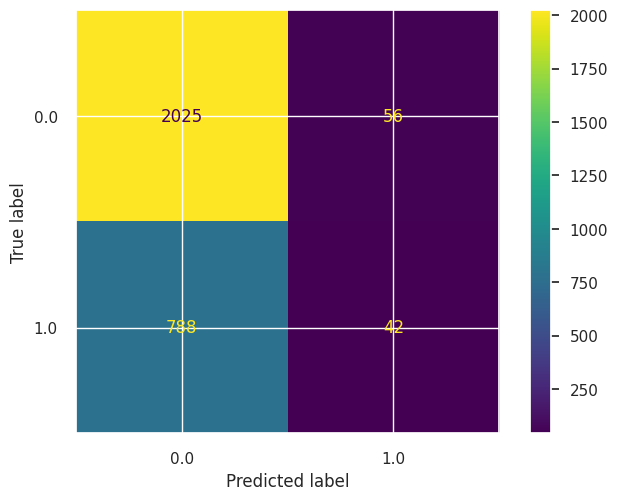

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
labels=y_test.unique()
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#recall =97.4%
#precision = 71.8%

In [ ]:
# Decision Tree Classifier 
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6379251116454826


In [ ]:
# Decision tree using continuous values
X_train1 = X_train.drop([rmap['V716'], rmap['V704']], axis=1)
y_train1 = y_train
X_test1 = X_test.drop([rmap['V716'], rmap['V704']], axis=1)
y_test1 = y_test

In [ ]:
# Decision Tree Classifier 
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)
text_representation = tree.export_text(clf)

# print(text_representation)
#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1)) #Accuracy increased by dropping attributes like Respondent's occupation , husband's occupation

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, feature_names=X_train1,class_names=y_train1,filled=True)

Accuracy: 0.7007901064926142


In [ ]:
# Prune the decision tree using cost complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # remove the maximum alpha value

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
print(train_scores)
print(test_scores)

[0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254, 0.8754509534444254,

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)
 
# making predictions on the testing set
y_pred1 = gnb.predict(X_test1)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test1, y_pred1)*100)

Gaussian Naive Bayes model accuracy(in %): 71.00652696667812


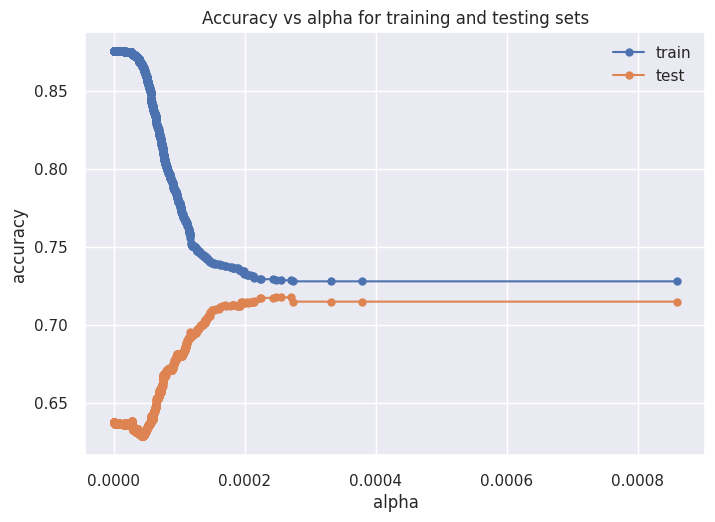

In [ ]:
#For plotting 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### 2.2 Descriptive Data Mining 

In [ ]:
# APRIORI for record data

In [ ]:
X_discrete=df3.copy()

In [ ]:
X_discrete

,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Husband Occupation,Respondent Occupation,Husband Education,Diabetes,Hypertension,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,Disease
6,2.0,2.0,3.0,3.0,2.0,0.0,57.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2.0,2.0,5.0,4.0,2.0,0.0,81.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,2.0,2.0,5.0,4.0,2.0,0.0,79.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,2.0,2.0,3.0,4.0,2.0,0.0,40.0,52.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,2.0,2.0,4.0,3.0,2.0,1.0,40.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,2.0,2.0,5.0,3.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232839,2.0,2.0,3.0,3.0,2.0,0.0,63.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232840,2.0,2.0,7.0,2.0,2.0,0.0,42.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232858,2.0,2.0,6.0,4.0,2.0,0.0,16.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
code_names=[]
for nm in X_discrete.columns:
  if nm in map:
    code_names.append(map[nm])
  else:
    code_names.append(nm)
code_names

['V025',
 'V106',
 'V107',
 'V190',
 'V452A',
 'V454',
 'V704',
 'V716',
 'V729',
 'S728A',
 'S728B',
 'S728C',
 'S728D',
 'S728E',
 'S728F',
 'S728G',
 'S456E',
 'Disease']

In [ ]:
X_discrete.columns=code_names

In [ ]:
X_discrete

,V025,V106,V107,V190,V452A,V454,V704,V716,V729,S728A,S728B,S728C,S728D,S728E,S728F,S728G,S456E,Disease
6,2.0,2.0,3.0,3.0,2.0,0.0,57.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,2.0,2.0,5.0,4.0,2.0,0.0,81.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,2.0,2.0,5.0,4.0,2.0,0.0,79.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,2.0,2.0,3.0,4.0,2.0,0.0,40.0,52.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,2.0,2.0,4.0,3.0,2.0,1.0,40.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,2.0,2.0,5.0,3.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232839,2.0,2.0,3.0,3.0,2.0,0.0,63.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232840,2.0,2.0,7.0,2.0,2.0,0.0,42.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232858,2.0,2.0,6.0,4.0,2.0,0.0,16.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_discrete.index

Int64Index([     6,     30,     35,     64,     83,     84,    109,    110,
               114,    134,
            ...
            232801, 232803, 232823, 232827, 232828, 232837, 232839, 232840,
            232858, 232901],
           dtype='int64', length=14686)

In [ ]:
df

,State,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Health Insurance,Employee State,Central,...,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,PCA1,PCA2,PCA3,Disease
6,1.0,2.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.069981,-1.886478,-0.899969,0.0
30,1.0,2.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.893195,-1.514105,-0.271782,0.0
32,1.0,2.0,3.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.224283,-1.472048,-0.405135,0.0
35,1.0,2.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.185695,0.093845,-0.083138,0.0
63,1.0,2.0,2.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.091108,1.894978,-1.572406,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232858,37.0,2.0,2.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.210124,0.562635,-0.000812,0.0
232862,37.0,2.0,3.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.130167,0.734585,0.683276,0.0
232882,37.0,1.0,2.0,7.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.728020,1.480060,-1.801368,0.0
232895,37.0,1.0,2.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.324119,2.268020,1.526836,0.0


In [ ]:
Filter_df  = df[df.index.isin(X_discrete.index)]

In [ ]:
Filter_df

,State,Residence Type,Highest Education,Highest Year,Wealth Index,Age Under 18,Currently Pregnant,Health Insurance,Employee State,Central,...,Respiratory,Thyroid,Heart,Cancer,Kidney,Pocket Cost,PCA1,PCA2,PCA3,Disease
6,1.0,2.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.069981,-1.886478,-0.899969,0.0
30,1.0,2.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.893195,-1.514105,-0.271782,0.0
35,1.0,2.0,2.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.185695,0.093845,-0.083138,0.0
64,1.0,2.0,2.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.816934,-0.053628,0.501138,0.0
83,1.0,2.0,2.0,4.0,3.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.908215,0.293150,-1.235959,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,37.0,2.0,2.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.371519,0.618587,0.160544,0.0
232839,37.0,2.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.377984,0.048569,0.154590,0.0
232840,37.0,2.0,2.0,7.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.401252,0.626640,0.161868,0.0
232858,37.0,2.0,2.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.210124,0.562635,-0.000812,0.0


In [ ]:
State_values=Filter_df['State']
State_values=State_values.iloc[:,:-1]
State_values

,State
6,1.0
30,1.0
35,1.0
64,1.0
83,1.0
...,...
232837,37.0
232839,37.0
232840,37.0
232858,37.0


In [ ]:
X_discrete['V024']=State_values
X_discrete

,V025,V106,V107,V190,V452A,V454,V704,V716,V729,S728A,S728B,S728C,S728D,S728E,S728F,S728G,S456E,Disease,V024
6,2.0,2.0,3.0,3.0,2.0,0.0,57.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30,2.0,2.0,5.0,4.0,2.0,0.0,81.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35,2.0,2.0,5.0,4.0,2.0,0.0,79.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64,2.0,2.0,3.0,4.0,2.0,0.0,40.0,52.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83,2.0,2.0,4.0,3.0,2.0,1.0,40.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,2.0,2.0,5.0,3.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
232839,2.0,2.0,3.0,3.0,2.0,0.0,63.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
232840,2.0,2.0,7.0,2.0,2.0,0.0,42.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
232858,2.0,2.0,6.0,4.0,2.0,0.0,16.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


In [ ]:
Insurance_values=Filter_df['Health Insurance']
Insurance_values

6         0.0
30        0.0
35        0.0
64        0.0
83        0.0
         ... 
232837    0.0
232839    0.0
232840    0.0
232858    0.0
232901    1.0
Name: Health Insurance, Length: 14686, dtype: float64

In [ ]:
X_discrete['S456E']=Insurance_values
X_discrete

,V025,V106,V107,V190,V452A,V454,V704,V716,V729,S728A,S728B,S728C,S728D,S728E,S728F,S728G,S456E,Disease,V024
6,2.0,2.0,3.0,3.0,2.0,0.0,57.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30,2.0,2.0,5.0,4.0,2.0,0.0,81.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35,2.0,2.0,5.0,4.0,2.0,0.0,79.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64,2.0,2.0,3.0,4.0,2.0,0.0,40.0,52.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83,2.0,2.0,4.0,3.0,2.0,1.0,40.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,2.0,2.0,5.0,3.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
232839,2.0,2.0,3.0,3.0,2.0,0.0,63.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
232840,2.0,2.0,7.0,2.0,2.0,0.0,42.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
232858,2.0,2.0,6.0,4.0,2.0,0.0,16.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


In [ ]:
state_list=['Jammu & Kashmir','Himachal Pradesh','Punjab','Chandigarh','Uttarakhand','Haryana','Nct Of Delhi','Rajasthan','Uttar Pradesh','Bihar','Sikkim','Arunachal Pradesh','Nagaland','Manipur','Mizoram','Tripura','Meghalaya','Assam','West Bengal','Jharkhand','Odisha','Chhattisgarh','Madhya Pradesh','Gujarat','Dadra & Nagar Haveli And Daman & Diu','Maharashtra','Andhra Pradesh','Karnataka','Goa','Lakshadweep','Kerala','Tamil Nadu','Puducherry','Andaman & Nicobar Islands','Telangana','Ladakh']
for i in range(len(state_list)+1):
  if i== 25:
    continue
  if i>25:
    X_discrete['V024']=X_discrete['V024'].replace(1.0+i,state_list[i-1])
  else:
    X_discrete['V024']=X_discrete['V024'].replace(1.0+i,state_list[i])

In [ ]:
X_discrete=X_discrete.drop(['V107'],axis=1)#Don't need a number of level of education when already categorically present

In [ ]:
X_discrete['V025']=X_discrete['V025'].replace(1.0,'Urban')
X_discrete['V025']=X_discrete['V025'].replace(2.0,'Rural')

In [ ]:
X_discrete['V106']=X_discrete['V106'].replace(0.0,'No Education')
X_discrete['V106']=X_discrete['V106'].replace(1.0,'Primary')
X_discrete['V106']=X_discrete['V106'].replace(2.0,'Secondary')
X_discrete['V106']=X_discrete['V106'].replace(3.0,'Higher')

In [ ]:

X_discrete['V190']=X_discrete['V190'].replace(1.0,'Poorest')
X_discrete['V190']=X_discrete['V190'].replace(2.0,'Poorer')
X_discrete['V190']=X_discrete['V190'].replace(3.0,'Middle')
X_discrete['V190']=X_discrete['V190'].replace(4.0,'Richer')
X_discrete['V190']=X_discrete['V190'].replace(5.0,'Richest')

In [ ]:
X_discrete['V452A']=X_discrete['V452A'].replace(1.0,'Under age 18')
X_discrete['V452A']=X_discrete['V452A'].replace(2.0,'Age 18 or Older')
X_discrete['V454']=X_discrete['V454'].replace(0.0,-1)
X_discrete['V454']=X_discrete['V454'].replace(1.0,'Currently Pregnant')


In [ ]:

X_discrete['V729']=X_discrete['V729'].replace(0.0,'Husband/Partner-No education')
X_discrete['V729']=X_discrete['V729'].replace(1.0,'Husband/Partner-Incomplete primary')
X_discrete['V729']=X_discrete['V729'].replace(2.0,'Husband/Partner-Complete primary')
X_discrete['V729']=X_discrete['V729'].replace(3.0,'Husband/Partner-Incomplete secondary')
X_discrete['V729']=X_discrete['V729'].replace(4.0,'Husband/Partner-Complete secondary')
X_discrete['V729']=X_discrete['V729'].replace(5.0,'Husband/Partner-Higher')
X_discrete['V729']=X_discrete['V729'].replace(8.0,'Husband/Partner-Does not know')

In [ ]:
X_discrete['S728A']=X_discrete['S728A'].replace(0.0,-1)
X_discrete['S728A']=X_discrete['S728A'].replace(1.0,'Has Diabetes')
X_discrete['S728B']=X_discrete['S728B'].replace(0.0,-1)
X_discrete['S728B']=X_discrete['S728B'].replace(1.0,'Has Hypertension')
X_discrete['S728C']=X_discrete['S728C'].replace(0.0,-1)
X_discrete['S728C']=X_discrete['S728C'].replace(1.0,'Has Chronic Respiratory Disease')
X_discrete['S728D']=X_discrete['S728D'].replace(0.0,-1)
X_discrete['S728D']=X_discrete['S728D'].replace(1.0,'Has thyroid disorder')
X_discrete['S728E']=X_discrete['S728E'].replace(0.0,-1)
X_discrete['S728E']=X_discrete['S728E'].replace(1.0,'Has heart disease')
X_discrete['S728F']=X_discrete['S728F'].replace(0.0,-1)
X_discrete['S728F']=X_discrete['S728F'].replace(1.0,'Has Cancer')
X_discrete['S728G']=X_discrete['S728G'].replace(0.0,-1)
X_discrete['S728G']=X_discrete['S728G'].replace(1.0,'Has Kidney Disorder')
X_discrete['Disease']=X_discrete['Disease'].replace(0.0,-1)
X_discrete['Disease']=X_discrete['Disease'].replace(1.0,'Has Diseases')

In [ ]:
X_discrete['S456E']=X_discrete['S456E'].replace(0.0,'No Health Insurance')
X_discrete['S456E']=X_discrete['S456E'].replace(1.0,'Has Health Insurance')


In [ ]:
dictV704={'1.0': 'Physical Scientists', '2.0': 'Physical Science', '3.0': 'Architects, Engineers, Technologists And Surveyors', '4.0': 'Engineering Technicians', '5.0': 'Aircraft And Ships Officers', '6.0': 'Life Scientists', '7.0': 'Life Science Technicians', '8.0': 'Physicians And Surgeons', '9.0': 'Nursing And Other Medical And Health Technicians', '10.0': 'Scientific, Medical And Technical Persons, Other', '11.0': 'Mathematicians, Statisticians And Related Workers', '12.0': 'Economists, And Related Workers', '13.0': 'Accountants, Auditors And Related Workers', '14.0': 'Social Scientists And Related Workers', '15.0': 'Jurists', '16.0': 'Teachers', '17.0': 'Poets, Authors, Journalists And Related Workers', '18.0': 'Sculptors, Painters, Photographers, And Related Creative Artists', '19.0': 'Composers And Performing Artists', '20.0': 'Professional Workers, N.E.C.', '21.0': 'Elected And Legislative Officials', '22.0': 'Administrative And Executive Officials Government And Local Bodies', '23.0': 'Working Proprietors, Directors And Managers, Wholesale And Retail Trade', '24.0': 'Directors And Managers, Financial Institutions', '25.0': 'Working Proprietors, Directors And Managers Mining', '26.0': 'Working Proprietors, Directors Managers And Related', '27.0': 'Working Proprietors, Directors And Managers, Other Services', '29.0': 'Administrative, Executive And Managerial Workers, N.E.C.', '30.0': 'Clerical And Other Supervisors', '31.0': 'Village Officials', '32.0': 'Stenographers, Typist And Card And Tape Punching Operators', '33.0': 'Book Keepers, Cashiers And Related Workers', '34.0': 'Computing Machine Operators', '35.0': 'Clerical And Related Workers', '36.0': 'Transport And Communication Supervisors', '37.0': 'Transport Conductors And Guards', '38.0': 'Mail Distributors And Related Workers', '39.0': 'Telephone And Telegraph Operators', '40.0': 'Merchants And Shopkeepers, Wholesale And Retail Trade', '41.0': 'Manufacturers, Agents', '42.0': 'Technical Salesmen And Commercial Travellers', '43.0': 'Salesmen, Shop Assistants And Related Workers', '44.0': 'Insurance, Real Estate, Securities And Business Service,', '45.0': 'Money Lenders And Pawn Brokers', '49.0': 'Sales Workers, N.E.C.', '50.0': 'Hotel And Restaurant Keepers', '51.0': 'House Keepers, Matron And Stewards (Domestic & Institutional)', '52.0': 'Cooks, Waiters, Bartenders And Related Workers (Domestic & Institutional)', '53.0': 'Maids And Related House Keeping Service Workers, N.E.C.', '54.0': 'Building Caretakers, Sweepers, Cleaners And Related Workers', '55.0': 'Launderers, Dry-Cleaners And Pressers, N.E.C.', '56.0': 'Hair Dresser, Barbers, Beauticians And Related Workers', '57.0': 'Protective Service Workers', '59.0': 'Service Workers', '60.0': 'Farm Plantation, Dairy And Other Managers And Supervisors', '61.0': 'Cultivators', '62.0': 'Farmers, Other Than Cultivators', '63.0': 'Agricultural Labourer', '64.0': 'Plantation Labourers & Related Workers', '65.0': 'Other Farm Workers', '66.0': 'Forestry Workers', '67.0': 'Hunters And Related Workers', '68.0': 'Fishermen And Related Workers', '71.0': 'Miners, Quarrymen, Well Drillers & Related Workers', '72.0': 'Metal Processors', '73.0': 'Wood Preparation Workers And Paper Makers', '74.0': 'Chemical Processors And Related Workers', '75.0': 'Spinners, Weavers, Knitters, Dyers And Related Workers', '76.0': 'Tanners, Fellmongers And Pelt Dressers', '77.0': 'Food And Beverage Processors', '78.0': 'Tobacco Preparers & Tobacco Product Makers', '79.0': 'Tailors, Dress Makers, Sewers, Upholsterers & Related Workers', '80.0': 'Shoemakers & Leather Goods Makers', '81.0': 'Carpenters, Cabinet & Related Wood Workers', '82.0': 'Stone Cutters & Carvers', '83.0': 'Blacksmiths, Tool Makers And Machine Tools Operators', '84.0': 'Machinery Fitters, Machine Assemblers And Precession Instrument Makers (Exc', '85.0': 'Electrical Fitters & Related Electrical & Electronic Workers', '86.0': 'Broadcasting Station And Sound Equipment Operators And Cinema Projectionist', '87.0': 'Plumbers, Welders, Sheet Metal & Structural Metal Preparers And Erectors', '88.0': 'Jewellery & Precious Metal Workers And Metal Engravers', '89.0': 'Glass Formers, Potters & Related Workers', '90.0': 'Rubber And Plastic Product Makers Workers', '91.0': 'Paper & Paper Board Products Makers', '92.0': 'Painters', '93.0': 'Stationery Engines And Related Equipment Operators, Oilers', '94.0': 'Transport Equipment Operators (Driver)', '95.0': 'Labourers (Labourers, N.E.C.)', '96.0': 'Other (New Workers Seeking Employment)', '97.0': 'Student / Workers Not Reporting Any Occupation)', '98.0': "DK (Don not Know)"}
dictV716={'0.0': "Not working and did not work in last 12 months", '1.0': 'Physical Scientists1', '2.0': 'Physical Science1', '3.0': 'Architects, Engineers, Technologists And Surveyors1', '4.0': 'Engineering Technicians1', '5.0': 'Aircraft And Ships Officers1', '6.0': 'Life Scientists1', '7.0': 'Life Science Technicians1', '8.0': 'Physicians And Surgeons1', '9.0': 'Nursing And Other Medical And Health Technicians1', '10.0': 'Scientific, Medical And Technical Persons, Other1', '11.0': 'Mathematicians, Statisticians And Related Workers1', '12.0': 'Economists, And Related Workers1', '13.0': 'Accountants, Auditors And Related Workers1', '14.0': 'Social Scientists And Related Workers1', '15.0': 'Jurists1', '16.0': 'Teachers1', '17.0': 'Poets, Authors, Journalists And Related Workers1', '18.0': 'Sculptors, Painters, Photographers, And Related Creative Artists1', '19.0': 'Composers And Performing Artists1', '20.0': 'Professional Workers, N.E.C.1', '21.0': 'Elected And Legislative Officials1', '22.0': 'Administrative And Executive Officials Government And Local Bodies1', '23.0': 'Working Proprietors, Directors And Managers, Wholesale And Retail Trade1', '24.0': 'Directors And Managers, Financial Institutions1', '25.0': 'Working Proprietors, Directors And Managers Mining1', '26.0': 'Working Proprietors, Directors Managers And Related1', '27.0': 'Working Proprietors, Directors And Managers, Other Services1', '29.0': 'Administrative, Executive And Managerial Workers, N.E.C.1', '30.0': 'Clerical And Other Supervisors1', '31.0': 'Village Officials1', '32.0': 'Stenographers, Typist And Card And Tape Punching Operators1', '33.0': 'Book Keepers, Cashiers And Related Workers1', '34.0': 'Computing Machine Operators1', '35.0': 'Clerical And Related Workers1', '36.0': 'Transport And Communication Supervisors1', '37.0': 'Transport Conductors And Guards1', '38.0': 'Mail Distributors And Related Workers1', '39.0': 'Telephone And Telegraph Operators1', '40.0': 'Merchants And Shopkeepers, Wholesale And Retail Trade1', '41.0': 'Manufacturers, Agents1', '42.0': 'Technical Salesmen And Commercial Travellers1', '43.0': 'Salesmen, Shop Assistants And Related Workers1', '44.0': 'Insurance, Real Estate, Securities And Business Service1', '45.0': 'Money Lenders And Pawn Brokers1', '49.0': 'Sales Workers, N.E.C.1', '50.0': 'Hotel And Restaurant Keepers1', '51.0': 'House Keepers, Matron And Stewards (Domestic & Institutional)1', '52.0': 'Cooks, Waiters, Bartenders And Related Workers (Domestic & Institutional)1', '53.0': 'Maids And Related House Keeping Service Workers, N.E.C.1', '54.0': 'Building Caretakers, Sweepers, Cleaners And Related Workers1', '55.0': 'Launderers, Dry-Cleaners And Pressers, N.E.C.1', '56.0': 'Hair Dresser, Barbers, Beauticians And Related Workers1', '57.0': 'Protective Service Workers1', '59.0': 'Service Workers1', '60.0': 'Farm Plantation, Dairy And Other Managers And Supervisors1', '61.0': 'Cultivators', '62.0': 'Farmers, Other Than Cultivators1', '63.0': 'Agricultural Labourer1', '64.0': 'Plantation Labourers & Related Workers1', '65.0': 'Other Farm Workers1', '66.0': 'Forestry Workers1', '67.0': 'Hunters And Related Workers1', '68.0': 'Fishermen And Related Workers1', '71.0': 'Miners, Quarrymen, Well Drillers & Related Workers1', '72.0': 'Metal Processors1', '73.0': 'Wood Preparation Workers And Paper Makers1', '74.0': 'Chemical Processors And Related Workers1', '75.0': 'Spinners, Weavers, Knitters, Dyers And Related Workers1', '76.0': 'Tanners, Fellmongers And Pelt Dressers1', '77.0': 'Food And Beverage Processors1', '78.0': 'Tobacco Preparers & Tobacco Product Makers1', '79.0': 'Tailors, Dress Makers, Sewers, Upholsterers & Related Workers1', '80.0': 'Shoemakers & Leather Goods Makers1', '81.0': 'Carpenters, Cabinet & Related Wood Workers1', '82.0': 'Stone Cutters & Carvers1', '83.0': 'Blacksmiths, Tool Makers And Machine Tools Operators1', '84.0': 'Machinery Fitters, Machine Assemblers And Precession Instrument Makers1', '85.0': 'Electrical Fitters & Related Electrical & Electronic Workers1', '86.0': 'Broadcasting Station And Sound Equipment Operators And Cinema Projection1', '87.0': 'Plumbers, Welders, Sheet Metal & Structural Metal Preparers And Erectors1', '88.0': 'Jewellery & Precious Metal Workers And Metal Engravers1', '89.0': 'Glass Formers, Potters & Related Workers1', '90.0': 'Rubber And Plastic Product Makers Workers1', '91.0': 'Paper & Paper Board Products Makers1', '92.0': 'Painters1', '93.0': 'Stationery Engines And Related Equipment Operators, Oilers1', '94.0': 'Transport Equipment Operators (Drivers)1', '95.0': 'Labourers (Labourers, N.E.C.)1', '96.0': 'Other (Occupation not found)1', '98.0': "Do not know1"}
dictV704Keys=list(dictV704.keys())
dictV716Keys=list(dictV716.keys())
for i in dictV704Keys: 
  dictV704[i]='Husband/Partner-' +dictV704[i]
for i in dictV716Keys: 
  dictV716[i]='Respondent-' +dictV716[i]
X_discrete['V704']=X_discrete['V704'].astype('str')
X_discrete['V716']=X_discrete['V716'].astype('str')
X_discrete=X_discrete.replace({'V704':dictV704})
X_discrete=X_discrete.replace({'V716':dictV716})

In [ ]:
# get union of all values in all columns
union = pd.Series(list(set(X_discrete.values.ravel())))

# create a dataframe with the union as the columns
result = pd.DataFrame(columns=union)

# iterate over each column in the original dataframe
for col in X_discrete.columns:
    # get dummies for each column
    dummies = pd.get_dummies(X_discrete[col], prefix=col)
    # concatenate with result dataframe
    result = pd.concat([result, dummies], axis=1)

# fill NaN values with 0
result = result.fillna(0)

In [ ]:
result

,Secondary,Husband/Partner-Computing Machine Operators,"Husband/Partner-Labourers (Labourers, N.E.C.)","Husband/Partner-Accountants, Auditors And Related Workers",Punjab,"Respondent-Hair Dresser, Barbers, Beauticians And Related Workers1","Respondent-Scientific, Medical And Technical Persons, Other1",Andhra Pradesh,Lakshadweep,Karnataka,...,V024_Puducherry,V024_Punjab,V024_Rajasthan,V024_Sikkim,V024_Tamil Nadu,V024_Telangana,V024_Tripura,V024_Uttar Pradesh,V024_Uttarakhand,V024_West Bengal
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dictV716v=list(dictV716.values())

dictV716v=['V716_'+ x for x in dictV716v]
dictV704v=list(dictV704.values())
dictV704v=['V704_'+ x for x in dictV704v]
dictV716v= [k for k in dictV716v if k in result.columns]

dictV704v= [k for k in dictV704v if k in result.columns]
dictV704v.pop(-2)
dictV716v.pop(0)

'V716_Respondent-Not working and did not work in last 12 months'

In [ ]:
print(dictV704v)

['V704_Husband/Partner-Physical Scientists', 'V704_Husband/Partner-Physical Science', 'V704_Husband/Partner-Architects, Engineers, Technologists And Surveyors', 'V704_Husband/Partner-Engineering Technicians', 'V704_Husband/Partner-Aircraft And Ships Officers', 'V704_Husband/Partner-Life Scientists', 'V704_Husband/Partner-Life Science Technicians', 'V704_Husband/Partner-Physicians And Surgeons', 'V704_Husband/Partner-Nursing And Other Medical And Health Technicians', 'V704_Husband/Partner-Scientific, Medical And Technical Persons, Other', 'V704_Husband/Partner-Mathematicians, Statisticians And Related Workers', 'V704_Husband/Partner-Economists, And Related Workers', 'V704_Husband/Partner-Accountants, Auditors And Related Workers', 'V704_Husband/Partner-Social Scientists And Related Workers', 'V704_Husband/Partner-Jurists', 'V704_Husband/Partner-Teachers', 'V704_Husband/Partner-Poets, Authors, Journalists And Related Workers', 'V704_Husband/Partner-Sculptors, Painters, Photographers, And

In [ ]:
result['Respondent-Working']=result.loc[:,dictV716v].sum(axis=1)
result['Husband/Partner-Working']=result.loc[:,dictV704v].sum(axis=1)

<ipython-input-79-37ec3dcca62c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result['Respondent-Working']=result.loc[:,dictV716v].sum(axis=1)
<ipython-input-79-37ec3dcca62c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result['Husband/Partner-Working']=result.loc[:,dictV704v].sum(axis=1)


In [ ]:
cols=X_discrete.columns
cols=cols+'_-1.0'
cols=list(cols)
cols

['V025_-1.0',
 'V106_-1.0',
 'V190_-1.0',
 'V452A_-1.0',
 'V454_-1.0',
 'V704_-1.0',
 'V716_-1.0',
 'V729_-1.0',
 'S728A_-1.0',
 'S728B_-1.0',
 'S728C_-1.0',
 'S728D_-1.0',
 'S728E_-1.0',
 'S728F_-1.0',
 'S728G_-1.0',
 'S456E_-1.0',
 'Disease_-1.0',
 'V024_-1.0']

In [ ]:
cols=cols[9:-2]
cols.append('V454_-1.0')
cols.append('Disease_Has Diseases')
cols.append('Disease_-1.0')

In [ ]:
cols

['S728B_-1.0',
 'S728C_-1.0',
 'S728D_-1.0',
 'S728E_-1.0',
 'S728F_-1.0',
 'S728G_-1.0',
 'S456E_-1.0',
 'V454_-1.0',
 'Disease_Has Diseases',
 'Disease_-1.0']

In [ ]:
del cols[-4]

In [ ]:
cols.append('S728A_-1.0')

In [ ]:
cols

['S728B_-1.0',
 'S728C_-1.0',
 'S728D_-1.0',
 'S728E_-1.0',
 'S728F_-1.0',
 'S728G_-1.0',
 'V454_-1.0',
 'Disease_Has Diseases',
 'Disease_-1.0',
 'S728A_-1.0']

In [ ]:
table=result.copy()
table

,Secondary,Husband/Partner-Computing Machine Operators,"Husband/Partner-Labourers (Labourers, N.E.C.)","Husband/Partner-Accountants, Auditors And Related Workers",Punjab,"Respondent-Hair Dresser, Barbers, Beauticians And Related Workers1","Respondent-Scientific, Medical And Technical Persons, Other1",Andhra Pradesh,Lakshadweep,Karnataka,...,V024_Rajasthan,V024_Sikkim,V024_Tamil Nadu,V024_Telangana,V024_Tripura,V024_Uttar Pradesh,V024_Uttarakhand,V024_West Bengal,Respondent-Working,Husband/Partner-Working
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
232839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
232840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
232858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
table=table.drop(cols,axis=1)

In [ ]:
table.describe()

,Secondary,Husband/Partner-Computing Machine Operators,"Husband/Partner-Labourers (Labourers, N.E.C.)","Husband/Partner-Accountants, Auditors And Related Workers",Punjab,"Respondent-Hair Dresser, Barbers, Beauticians And Related Workers1","Respondent-Scientific, Medical And Technical Persons, Other1",Andhra Pradesh,Lakshadweep,Karnataka,...,V024_Rajasthan,V024_Sikkim,V024_Tamil Nadu,V024_Telangana,V024_Tripura,V024_Uttar Pradesh,V024_Uttarakhand,V024_West Bengal,Respondent-Working,Husband/Partner-Working
count,14686.0,14686.0,14686.0,14686.0,14686.0,14686.0,14686.0,14686.0,14686.0,14686.0,...,14686.000000,14686.000000,14686.000000,14686.000000,14686.000000,14686.000000,14686.000000,14686.000000,14686.000000,14686.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062236,0.003677,0.044532,0.036565,0.009397,0.132507,0.015185,0.028462,0.197535,0.993259
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.241592,0.060529,0.206281,0.187699,0.096483,0.339053,0.122291,0.166296,0.398153,0.081830
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
table=table.drop(['V452A_Age 18 or Older'],axis=1)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(table, min_support=0.004, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.752894,(V025_Rural)
1,0.247106,(V025_Urban)
2,0.203731,(V106_Higher)
3,0.138295,(V106_Primary)
4,0.657974,(V106_Secondary)
...,...,...
19520,0.005311,"(V704_Husband/Partner-Farmers, Other Than Cult..."
19521,0.006060,"(V716_Respondent-Agricultural Labourer1, V704_..."
19522,0.005107,"(V716_Respondent-Agricultural Labourer1, V704_..."
19523,0.004903,"(V716_Respondent-Agricultural Labourer1, V704_..."


In [ ]:
value='S456E_Has Health Insurance'
filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: value in x)]
filtered_itemsets


,support,itemsets
78,0.275160,(S456E_Has Health Insurance)
169,0.213469,"(S456E_Has Health Insurance, V025_Rural)"
229,0.061691,"(V025_Urban, S456E_Has Health Insurance)"
283,0.053248,"(S456E_Has Health Insurance, V106_Higher)"
327,0.043715,"(S456E_Has Health Insurance, V106_Primary)"
...,...,...
19463,0.004903,(V716_Respondent-Not working and did not work ...
19472,0.006741,"(V716_Respondent-Agricultural Labourer1, V704_..."
19499,0.006060,(V716_Respondent-Not working and did not work ...
19510,0.004290,(V716_Respondent-Not working and did not work ...


In [ ]:
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
rules_mlxtend

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V025_Rural),(V106_Higher),0.752894,0.203731,0.122770,0.163064,0.800388,-0.030618,0.951409
1,(V106_Higher),(V025_Rural),0.203731,0.752894,0.122770,0.602607,0.800388,-0.030618,0.621818
2,(V025_Rural),(V106_Primary),0.752894,0.138295,0.115825,0.153839,1.112399,0.011703,1.018370
3,(V106_Primary),(V025_Rural),0.138295,0.752894,0.115825,0.837518,1.112399,0.011703,1.520826
4,(V025_Rural),(V106_Secondary),0.752894,0.657974,0.514299,0.683097,1.038183,0.018915,1.079277
...,...,...,...,...,...,...,...,...,...
505155,(S456E_No Health Insurance),"(V716_Respondent-Agricultural Labourer1, V704_...",0.724840,0.006877,0.004835,0.006670,0.969828,-0.000150,0.999791
505156,(V106_Secondary),"(V716_Respondent-Agricultural Labourer1, V704_...",0.657974,0.006060,0.004835,0.007348,1.212439,0.000847,1.001297
505157,(Respondent-Working),"(V716_Respondent-Agricultural Labourer1, V704_...",0.197535,0.004835,0.004835,0.024474,5.062392,0.003880,1.020133
505158,(V729_Husband/Partner-Incomplete secondary),"(V716_Respondent-Agricultural Labourer1, V704_...",0.607654,0.006196,0.004835,0.007956,1.283988,0.001069,1.001774


In [ ]:
value='S456E_Has Health Insurance'
filtered_rules1 = rules_mlxtend[rules_mlxtend['antecedents'].apply(lambda x: value in x)]
filtered_rules2 = rules_mlxtend[rules_mlxtend['consequents'].apply(lambda x: value in x)]
filtered_rules=filtered_rules1.append(filtered_rules2)
filtered_rules

<ipython-input-94-0e6c5258544a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_rules=filtered_rules1.append(filtered_rules2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
116,(S456E_Has Health Insurance),(V025_Rural),0.275160,0.752894,0.213469,0.775798,1.030421,0.006302,1.102159
237,(S456E_Has Health Insurance),(V025_Urban),0.275160,0.247106,0.061691,0.224202,0.907310,-0.006302,0.970477
344,(S456E_Has Health Insurance),(V106_Higher),0.275160,0.203731,0.053248,0.193516,0.949861,-0.002811,0.987334
432,(S456E_Has Health Insurance),(V106_Primary),0.275160,0.138295,0.043715,0.158872,1.148788,0.005662,1.024463
570,(S456E_Has Health Insurance),(V106_Secondary),0.275160,0.657974,0.178197,0.647612,0.984252,-0.002851,0.970596
...,...,...,...,...,...,...,...,...,...
503120,(Husband/Partner-Working),"(V716_Respondent-Agricultural Labourer1, V704_...",0.993259,0.006537,0.006537,0.006581,1.006787,0.000044,1.000045
503122,(V106_Secondary),"(V716_Respondent-Agricultural Labourer1, V704_...",0.657974,0.008784,0.006537,0.009935,1.131027,0.000757,1.001162
503123,(Respondent-Working),"(V716_Respondent-Agricultural Labourer1, V704_...",0.197535,0.006537,0.006537,0.033092,5.062392,0.005246,1.027464
503124,(V729_Husband/Partner-Incomplete secondary),"(V716_Respondent-Agricultural Labourer1, V704_...",0.607654,0.009397,0.006537,0.010758,1.144817,0.000827,1.001376


In [ ]:
Rules_Insurance=filtered_rules[ (rules_mlxtend['lift'] >= 6) & (rules_mlxtend['confidence'] >= 1) ]

Rules_Insurance

<ipython-input-99-4b4c4a8809ad>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rules_Insurance=filtered_rules[ (rules_mlxtend['lift'] >= 6) & (rules_mlxtend['confidence'] >= 1) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158603,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural)",0.007150,0.162604,0.007150,1.0,6.149916,0.005987,inf
297600,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural)",0.004971,0.162604,0.004971,1.0,6.149916,0.004162,inf
345400,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural)",0.004222,0.162604,0.004222,1.0,6.149916,0.003535,inf
348441,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural)",0.004971,0.162604,0.004971,1.0,6.149916,0.004162,inf
348748,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural)",0.007150,0.162604,0.007150,1.0,6.149916,0.005987,inf
348767,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural, Husband/Partn...",0.007150,0.161787,0.007150,1.0,6.180976,0.005993,inf
443211,"(V716_Respondent-Agricultural Labourer1, Husba...","(Respondent-Working, V025_Rural)",0.004971,0.162604,0.004971,1.0,6.149916,0.004162,inf
443242,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural, Husband/Partn...",0.004971,0.161787,0.004971,1.0,6.180976,0.004167,inf
474079,"(V716_Respondent-Agricultural Labourer1, V704_...","(Respondent-Working, V025_Rural)",0.004222,0.162604,0.004222,1.0,6.149916,0.003535,inf
474104,"(V190_Poorer, S456E_Has Health Insurance, V716...","(Respondent-Working, V025_Rural, Husband/Partn...",0.004222,0.161787,0.004222,1.0,6.180976,0.003539,inf


In [ ]:
value1='Respondent-Working'
rules1 = rules_mlxtend[rules_mlxtend['antecedents'].apply(lambda x: value1 not in x)]
rules2 = rules_mlxtend[rules_mlxtend['consequents'].apply(lambda x: value1 not in x)]
rules_1=rules1.merge(rules2)

rules_1=rules_1[ (rules_1['lift'] >= 5) & (rules_1['confidence'] >= 0.95) ]
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16908,"(V024_Punjab, V729_Husband/Partner-Higher)",(V190_Richest),0.005515,0.189228,0.005243,0.950617,5.023665,0.004199,16.418136
57497,"(V024_Punjab, V716_Respondent-Not working and ...",(V190_Richest),0.006877,0.189228,0.006537,0.950495,5.023019,0.005235,16.377598
57889,"(V024_Punjab, V106_Higher, Husband/Partner-Wor...",(V190_Richest),0.007967,0.189228,0.007626,0.957265,5.058796,0.006119,18.972069
89543,"(V024_Punjab, V729_Husband/Partner-Higher, Hus...",(V190_Richest),0.005447,0.189228,0.005243,0.962500,5.086461,0.004212,21.620591
89548,"(V024_Punjab, V729_Husband/Partner-Higher)","(V190_Richest, Husband/Partner-Working)",0.005515,0.188206,0.005243,0.950617,5.050928,0.004205,16.438819
183674,"(V024_Punjab, V106_Higher, V716_Respondent-Not...",(V190_Richest),0.006809,0.189228,0.006537,0.960000,5.073249,0.005248,20.269304
183682,"(V024_Punjab, V716_Respondent-Not working and ...","(V190_Richest, Husband/Partner-Working)",0.006877,0.188206,0.006537,0.950495,5.050279,0.005242,16.398230
184244,"(V024_Punjab, V106_Higher, S456E_No Health Ins...",(V190_Richest),0.006877,0.189228,0.006537,0.950495,5.023019,0.005235,16.377598
231644,"(V024_Punjab, V729_Husband/Partner-Higher, V71...",(V190_Richest),0.004698,0.189228,0.004494,0.956522,5.054868,0.003605,18.647760
232544,"(V024_Punjab, V729_Husband/Partner-Higher, S45...",(V190_Richest),0.004358,0.189228,0.004154,0.953125,5.036918,0.003329,17.296473


In [ ]:
table_new=table.copy()
table_new=table_new.drop(['Husband/Partner-Working','Respondent-Working'],axis=1)

In [ ]:
table_new

,Secondary,Husband/Partner-Computing Machine Operators,"Husband/Partner-Labourers (Labourers, N.E.C.)","Husband/Partner-Accountants, Auditors And Related Workers",Punjab,"Respondent-Hair Dresser, Barbers, Beauticians And Related Workers1","Respondent-Scientific, Medical And Technical Persons, Other1",Andhra Pradesh,Lakshadweep,Karnataka,...,V024_Puducherry,V024_Punjab,V024_Rajasthan,V024_Sikkim,V024_Tamil Nadu,V024_Telangana,V024_Tripura,V024_Uttar Pradesh,V024_Uttarakhand,V024_West Bengal
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets1 = apriori(table_new, min_support=0.04, use_colnames=True)
rules_all = association_rules(frequent_itemsets1, metric="lift", min_threshold=3)
rules_all


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(S456E_Has Health Insurance),(V024_Rajasthan),0.275160,0.062236,0.051546,0.187330,3.009985,0.034421,1.153929
1,(V024_Rajasthan),(S456E_Has Health Insurance),0.062236,0.275160,0.051546,0.828228,3.009985,0.034421,4.219769
2,"(S456E_Has Health Insurance, V025_Rural)",(V024_Rajasthan),0.213469,0.062236,0.040923,0.191707,3.080309,0.027638,1.160177
3,"(V024_Rajasthan, V025_Rural)",(S456E_Has Health Insurance),0.048822,0.275160,0.040923,0.838215,3.046281,0.027489,4.480261
4,(S456E_Has Health Insurance),"(V024_Rajasthan, V025_Rural)",0.275160,0.048822,0.040923,0.148726,3.046281,0.027489,1.117358
5,(V024_Rajasthan),"(S456E_Has Health Insurance, V025_Rural)",0.062236,0.213469,0.040923,0.657549,3.080309,0.027638,2.296772
6,"(V025_Urban, V106_Higher)",(V190_Richest),0.080961,0.189228,0.054133,0.668629,3.533461,0.038813,2.446721
7,(V190_Richest),"(V025_Urban, V106_Higher)",0.189228,0.080961,0.054133,0.286074,3.533461,0.038813,1.287302
8,"(V025_Urban, V729_Husband/Partner-Higher)",(V106_Higher),0.079532,0.203731,0.054269,0.682363,3.349326,0.038066,2.506851
9,"(V025_Urban, V106_Higher)",(V729_Husband/Partner-Higher),0.080961,0.220959,0.054269,0.670311,3.033649,0.036380,2.362959


In [ ]:
RULES=rules_all[ (rules_all['confidence'] >= 0.72) ]
RULES

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(V024_Rajasthan),(S456E_Has Health Insurance),0.062236,0.27516,0.051546,0.828228,3.009985,0.034421,4.219769
3,"(V024_Rajasthan, V025_Rural)",(S456E_Has Health Insurance),0.048822,0.27516,0.040923,0.838215,3.046281,0.027489,4.480261


**AN IMPLMENTATION OF APRIORI ALGORITHM WITHOUT LIBRARIES**

In [ ]:

from itertools import combinations
# find frequent itemsets using Apriori algorithm
def apriori1(df, min_support):
    itemsets = {}
    # initialize frequent 1-itemsets
    itemsets[1] = {}
    for col in df.columns:
        itemsets[1][col] = df[col].sum()

    k = 1
    while True:
        # generate candidate itemsets
        candidates = {}
        for itemset in itemsets[k]:
            for col in df.columns:
                if col not in itemset:
                    candidate = tuple(sorted(itemset + (col,)))
                    if candidate not in candidates:
                        candidates[candidate] = 0
        # count support for candidate itemsets
        for candidate in candidates:
            for row in range(df.shape[0]):
                if all(df.loc[row, list(candidate)]):
                    candidates[candidate] += 1
        # filter frequent itemsets based on min_support
        k += 1
        itemsets[k] = {}
        for candidate in candidates:
            support = candidates[candidate] / df.shape[0]
            if support >= min_support:
                itemsets[k][candidate] = support
        if not itemsets[k]:
            del itemsets[k]
            break
    return itemsets

# find association rules from frequent itemsets
def association_rules1(itemsets, min_confidence):
    rules = []
    for k in range(2, len(itemsets)+1):
        for itemset in itemsets[k]:
            for i in range(1, k):
                for antecedent in combinations(itemset, i):
                    consequent = tuple(sorted(set(itemset) - set(antecedent)))
                    support = itemsets[k][itemset]
                    confidence = itemsets[k-1][antecedent] / itemsets[k-1][consequent]
                    if confidence >= min_confidence:
                        rules.append((antecedent, consequent, support, confidence))
    return rules